In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import osr
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("C:\\Users\\abhip\\Desktop\\globalterrorismdb_0718dist.csv",low_memory=False,encoding="ISO-8859-1")

In [4]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [6]:
dataset_updated=df.rename(columns={'iyear':'year','imonth':'month','extended':'extend_date','iday':'day','country_txt':'country_name',
                   'provstate':'state', 'country':'country_code','region':'region_code','city':'city','region_txt':'region_name','attacktype1_txt':'attack_type','target1':'specific_target',
                   'nkill':'killed','nwound':'wounded','summary':'summary','gname':'gang','targtype1':'target_code',
                   'targtype1_txt':'target_type','weaptype1_txt':'weapon_type','weaptype1':'weapon_Code','motive':'motive'})

In [7]:
dataset_updated

,eventid,year,month,day,approxdate,extend_date,resolution,country_code,country_name,region_code,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [8]:
dataset_updated=dataset_updated[['year','month','extend_date','day','country_name','state','country_code','region_code','city','region_name','attack_type','specific_target','killed','wounded','success','summary','gang','target_code','target_type','weapon_type','weapon_Code','motive']]

In [9]:
dataset_updated.head()

,year,month,extend_date,day,country_name,state,country_code,region_code,city,region_name,...,killed,wounded,success,summary,gang,target_code,target_type,weapon_type,weapon_Code,motive
0,1970,7,0,2,Dominican Republic,NaN,58,2,Santo Domingo,Central America & Caribbean,...,1.0,0.0,1,NaN,MANO-D,14,Private Citizens & Property,Unknown,13,NaN
1,1970,0,0,0,Mexico,Federal,130,1,Mexico city,North America,...,0.0,0.0,1,NaN,23rd of September Communist League,7,Government (Diplomatic),Unknown,13,NaN
2,1970,1,0,0,Philippines,Tarlac,160,5,Unknown,Southeast Asia,...,1.0,0.0,1,NaN,Unknown,10,Journalists & Media,Unknown,13,NaN
3,1970,1,0,0,Greece,Attica,78,8,Athens,Western Europe,...,NaN,NaN,1,NaN,Unknown,7,Government (Diplomatic),Explosives,6,NaN
4,1970,1,0,0,Japan,Fukouka,101,4,Fukouka,East Asia,...,NaN,NaN,1,NaN,Unknown,7,Government (Diplomatic),Incendiary,8,NaN


Filtered 22 column from 135 column that is more important


In [10]:
#year
dataset_updated['year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: year, dtype: int64

In [13]:
plt.figure(figsize=(20,5));
sns.barplot(dataset_updated['year'].value_counts().ind
ex,dataset_updated['year'].value_counts().values)
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attack each year')
plt.title('Attack of years')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (4254471103.py, line 2)

In [14]:
dataset_updated['year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: year, dtype: int64

# Outcome


1.Least attack is in 1970
2.most attack is in 2014

In [15]:
#month
dataset_updated['month'].value_counts().max

<bound method NDFrame._add_numeric_operations.<locals>.max of 5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: month, dtype: int64>

Text(0.5, 1.0, 'most attack in the month')

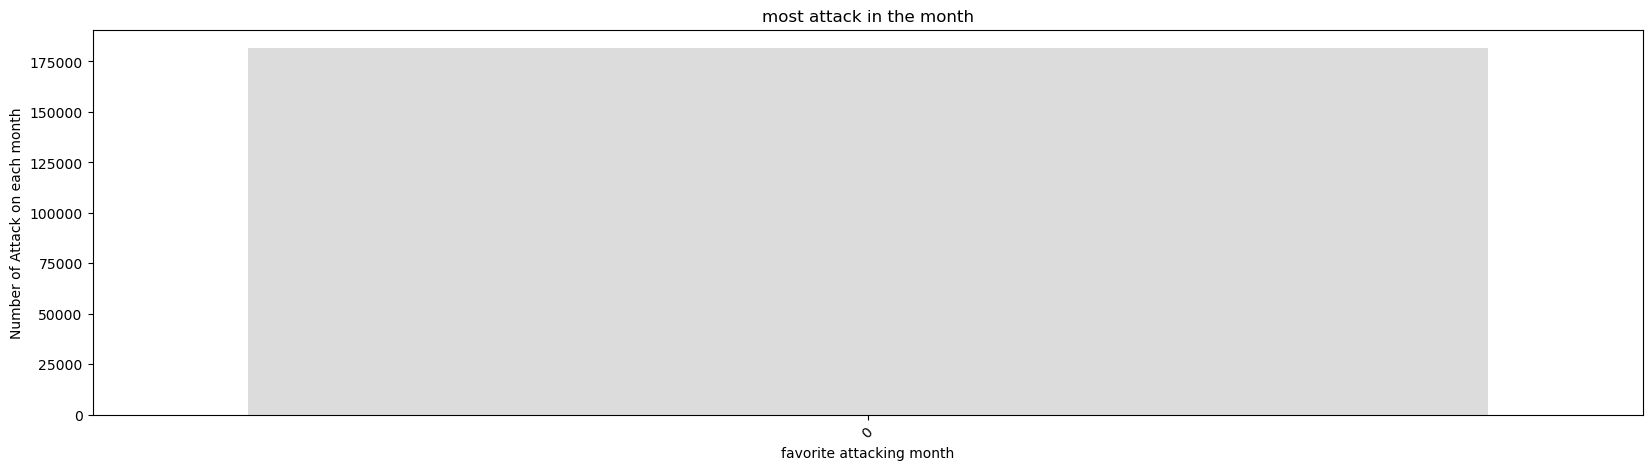

In [16]:
plt.figure(figsize=(20,5));
sns.countplot(dataset_updated['month'].sort_index(),palette='coolwarm')
plt.xticks(rotation = 45)
plt.xlabel('favorite attacking month')
plt.ylabel('Number of Attack on each month')
plt.title('most attack in the month')

# Outcome

1. 20 attacks were unknown at which month they attacked as 0

2. highest attacks were happened at month 5

In [17]:
#day
dataset_updated['day'].value_counts().max

<bound method NDFrame._add_numeric_operations.<locals>.max of 15    6500
1     6344
4     6153
16    6112
10    6064
9     6057
13    6043
14    6028
28    6027
12    6012
3     6011
7     5997
19    5973
2     5954
27    5937
11    5936
20    5930
18    5880
25    5875
8     5859
17    5852
5     5844
21    5827
26    5823
22    5799
23    5782
6     5781
24    5752
29    5507
30    5046
31    3095
0      891
Name: day, dtype: int64>

Text(0.5, 1.0, 'most attack in the day')

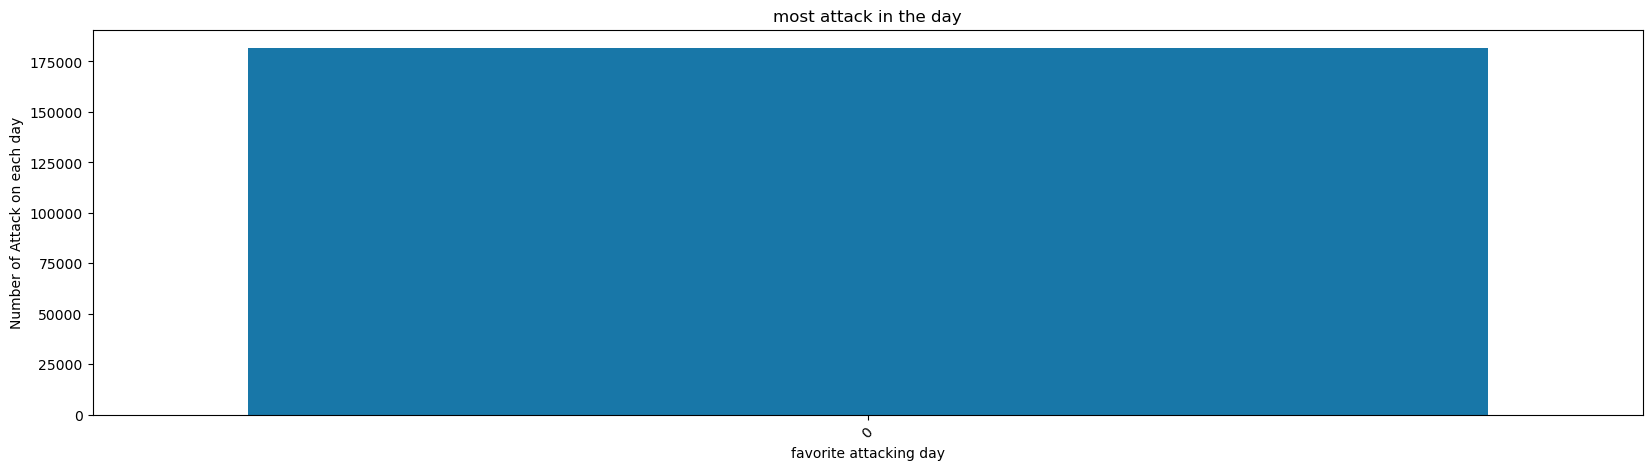

In [18]:
plt.figure(figsize=(20,5));
sns.countplot(dataset_updated['day'].sort_index(),palette='winter_r')
plt.xticks(rotation = 45)
plt.xlabel('favorite attacking day')
plt.ylabel('Number of Attack on each day')
plt.title('most attack in the day')

# Outcome

1. 891 attacks were unknown at which day they attacked as 0
2. highest attacks were happened at day 15

In [53]:
#country name
dataset_updated['country_name'] = dataset_updated['country_name'].fillna('unknown')
dataset_updated['country_name'].value_counts().max

C:\Users\abhip\AppData\Local\Temp\ipykernel_35864\2999022881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_updated['country_name'] = dataset_updated['country_name'].fillna('unknown')


<bound method NDFrame._add_numeric_operations.<locals>.max of Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: country_name, Length: 205, dtype: int64>

Text(0.5, 1.0, 'most attack in the country')

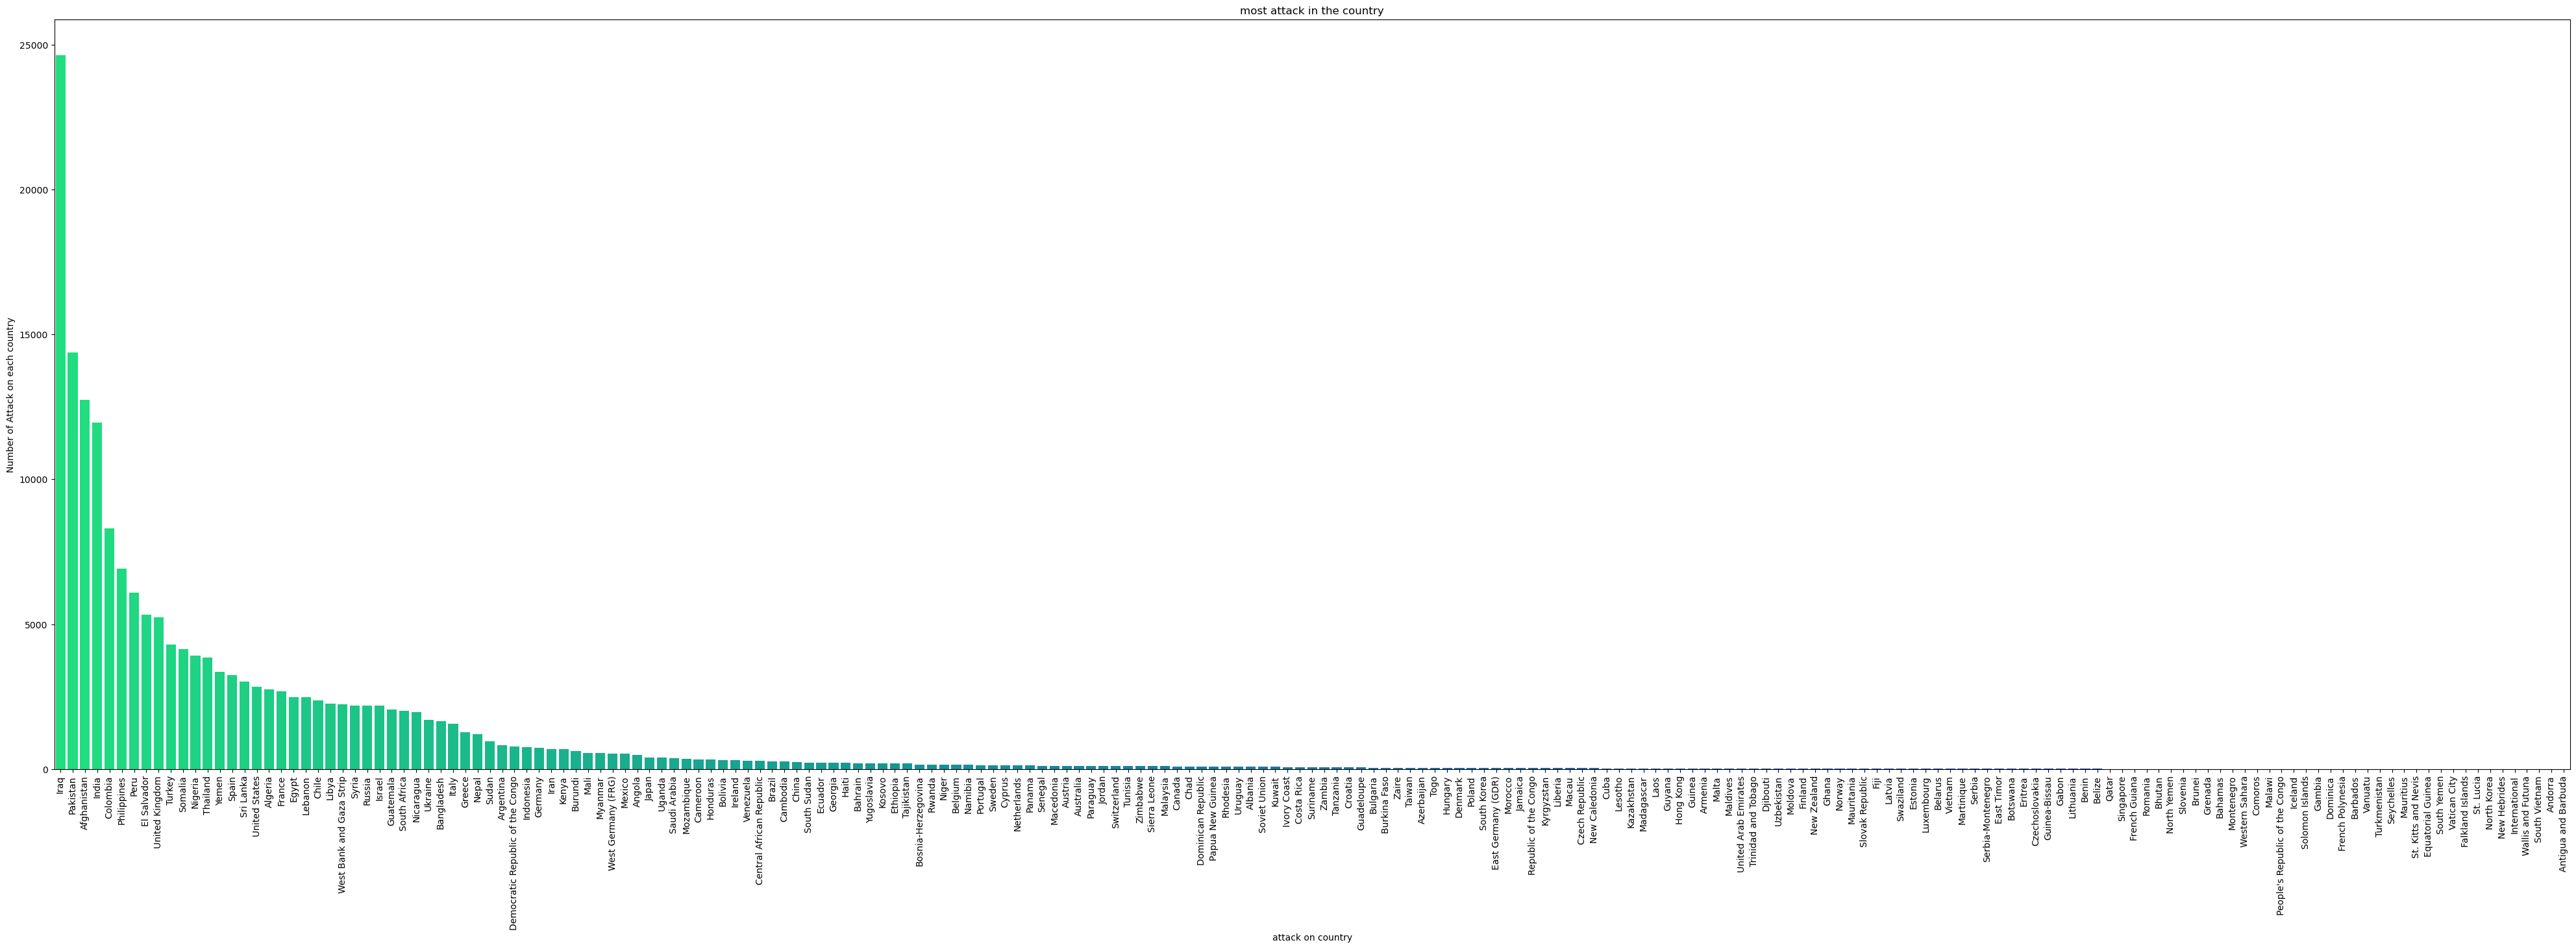

In [20]:
plt.figure(figsize=(50,15));
sns.countplot(x=dataset_updated['country_name'],palette='winter_r',order = dataset_updated['country_name'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('attack on country')
plt.ylabel('Number of Attack on each country')
plt.title('most attack in the country')

# Outcome

1. 24636 attacks were happened on iraq
2. there are many country which has least attack

In [21]:
#day
dataset_updated['region_name'].value_counts().max

<bound method NDFrame._add_numeric_operations.<locals>.max of Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_name, dtype: int64>

Text(0.5, 1.0, 'most attack in the region')

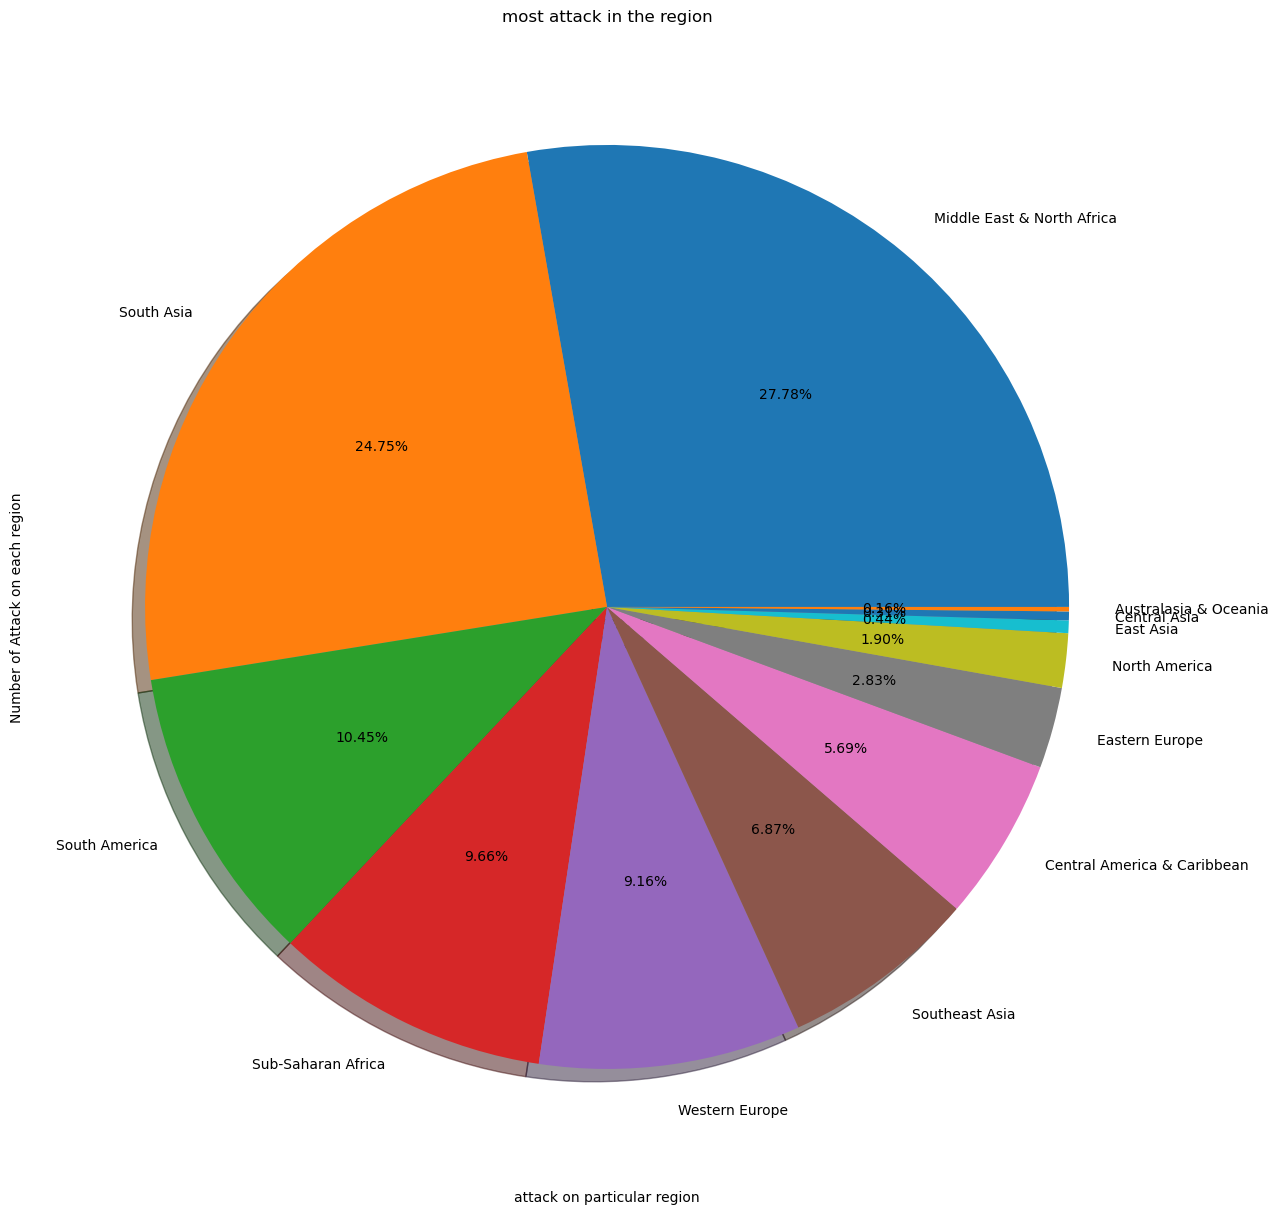

In [23]:
plt.figure(figsize=(90,15));
dataset_updated['region_name'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%')
plt.xticks(rotation = 90)
plt.xlabel('attack on particular region')
plt.ylabel('Number of Attack on each region')
plt.title('most attack in the region')

# Outcomes

1. most attack were happened at middle east and north africa with 50474
2. least attack were happened atAustralasia & Oceania with 282

In [51]:
dataset_updated['state'].value_counts()[:25].max

<bound method NDFrame._add_numeric_operations.<locals>.max of Baghdad                                7645
Unknown                                4711
Northern Ireland                       4498
Balochistan                            3710
Saladin                                3411
Al Anbar                               3299
Nineveh                                3241
Sindh                                  3206
Khyber Pakhtunkhwa                     3084
Diyala                                 3041
Lima                                   2615
Jammu and Kashmir                      2454
Federally Administered Tribal Areas    2392
San Salvador                           1923
Antioquia                              1891
Punjab                                 1778
Kirkuk                                 1669
Santiago Metropolitan                  1639
Banaadir                               1613
West Bank                              1584
Basque Country                         1446
Borno         

Text(0.5, 1.0, 'most attack in the state')

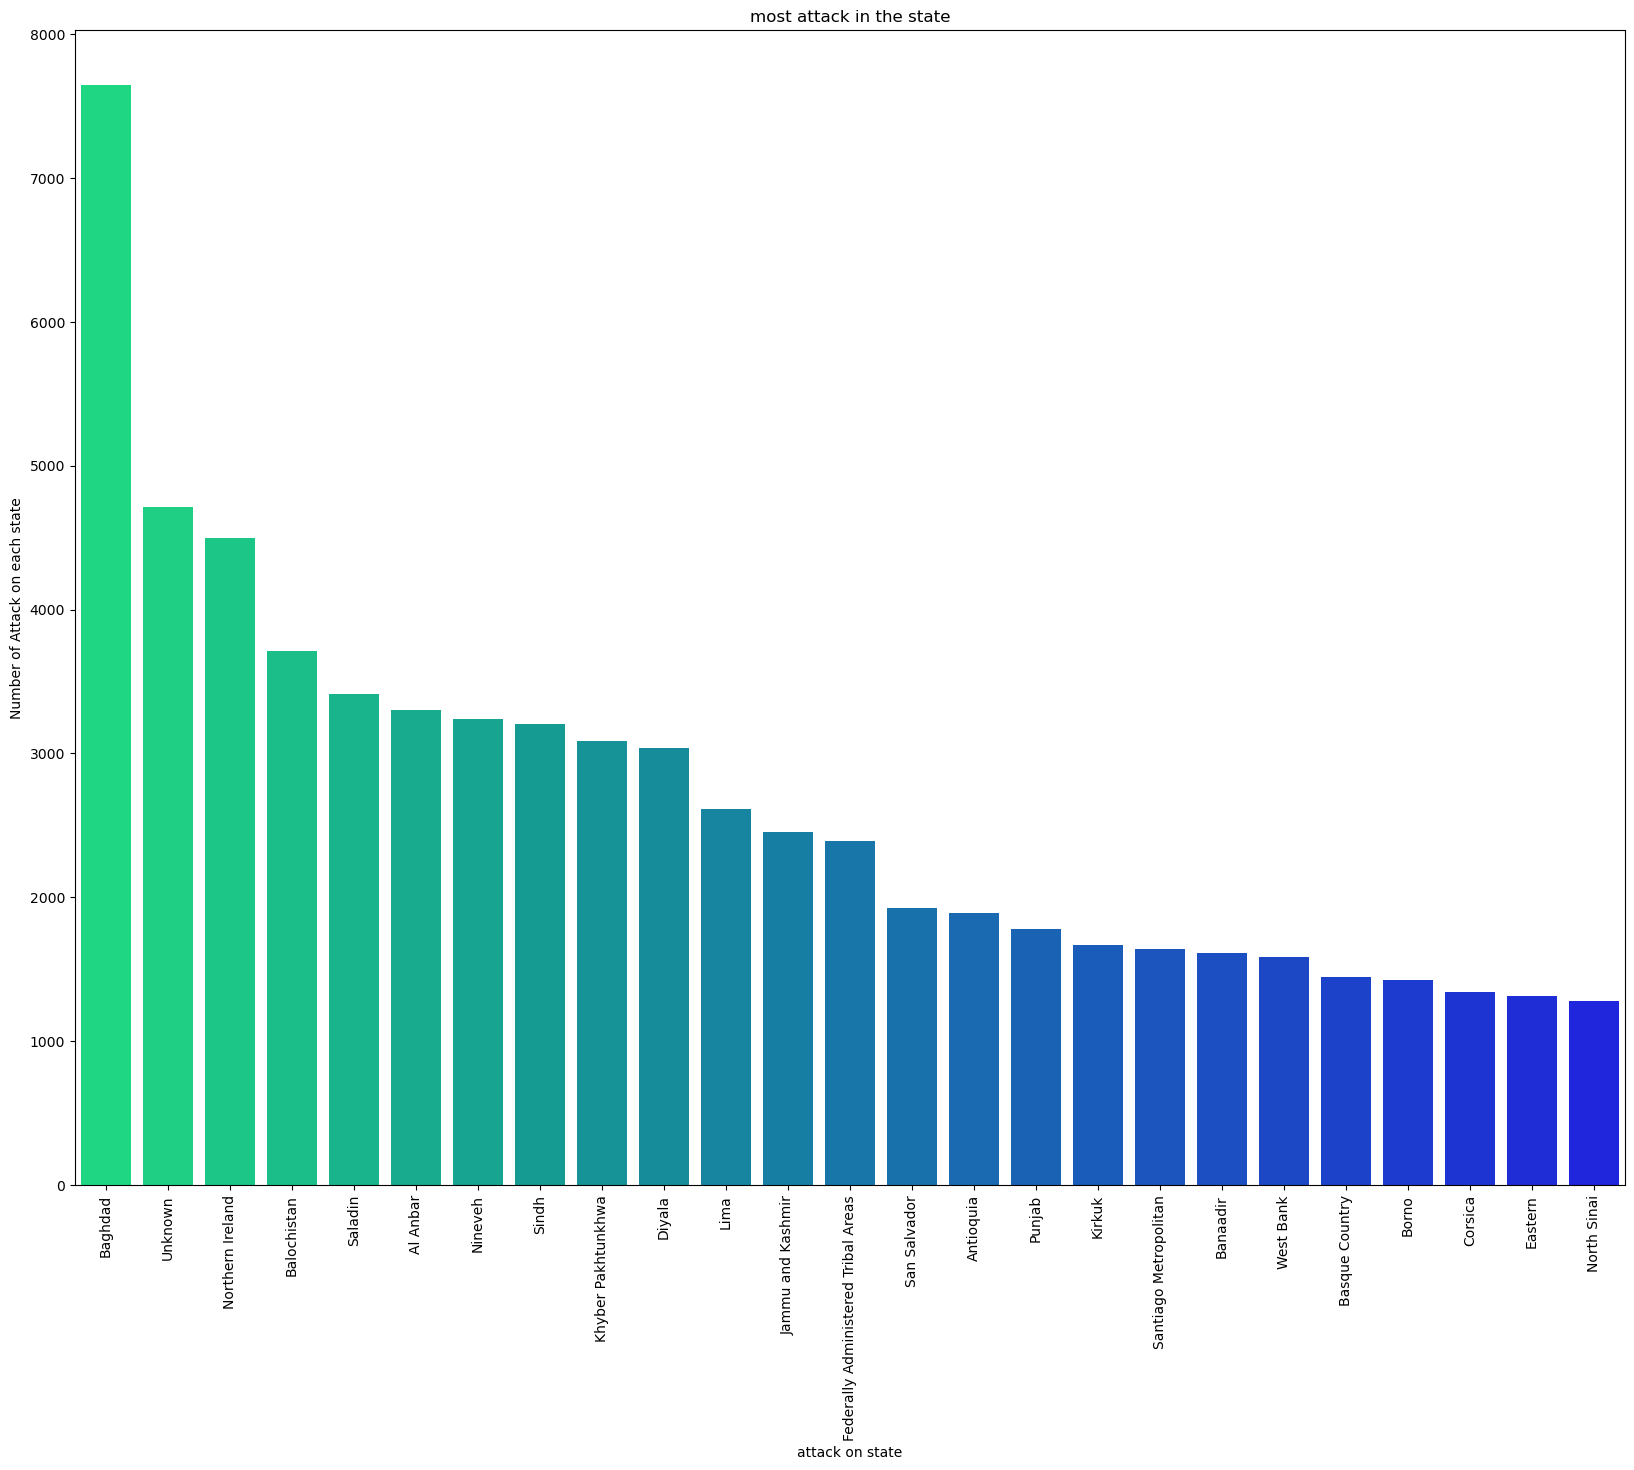

In [26]:
plt.figure(figsize=(20,15));
sns.barplot(x=dataset_updated['state'].value_counts().head(25).index,palette='winter_r',y=dataset_updated['state'].value_counts().head(25).values)
plt.xticks(rotation = 90)
plt.xlabel('attack on state')
plt.ylabel('Number of Attack on each state')
plt.title('most attack in the state')

In [27]:
dataset_updated['state'].value_counts().tail(20).min

<bound method NDFrame._add_numeric_operations.<locals>.min of Bishkek (Capital City)         1
Montenegro (Republic)          1
Rukwa                          1
Berber (Province)              1
Almaty (Municipal District)    1
Mitidja Plains (Province)      1
Cental Division                1
Guerrouche (Province)          1
Pristina district              1
Lika                           1
East Nusa Tenggara             1
Macuata                        1
Cakaudrove                     1
Smolensk Oblast                1
Mexican Federal District       1
Federal Territory              1
Topaz (Province)               1
Obilic (Municipality)          1
East Timor (Region)            1
Vidzeme                        1
Name: state, dtype: int64>

Text(0.5, 1.0, 'least attack in the state')

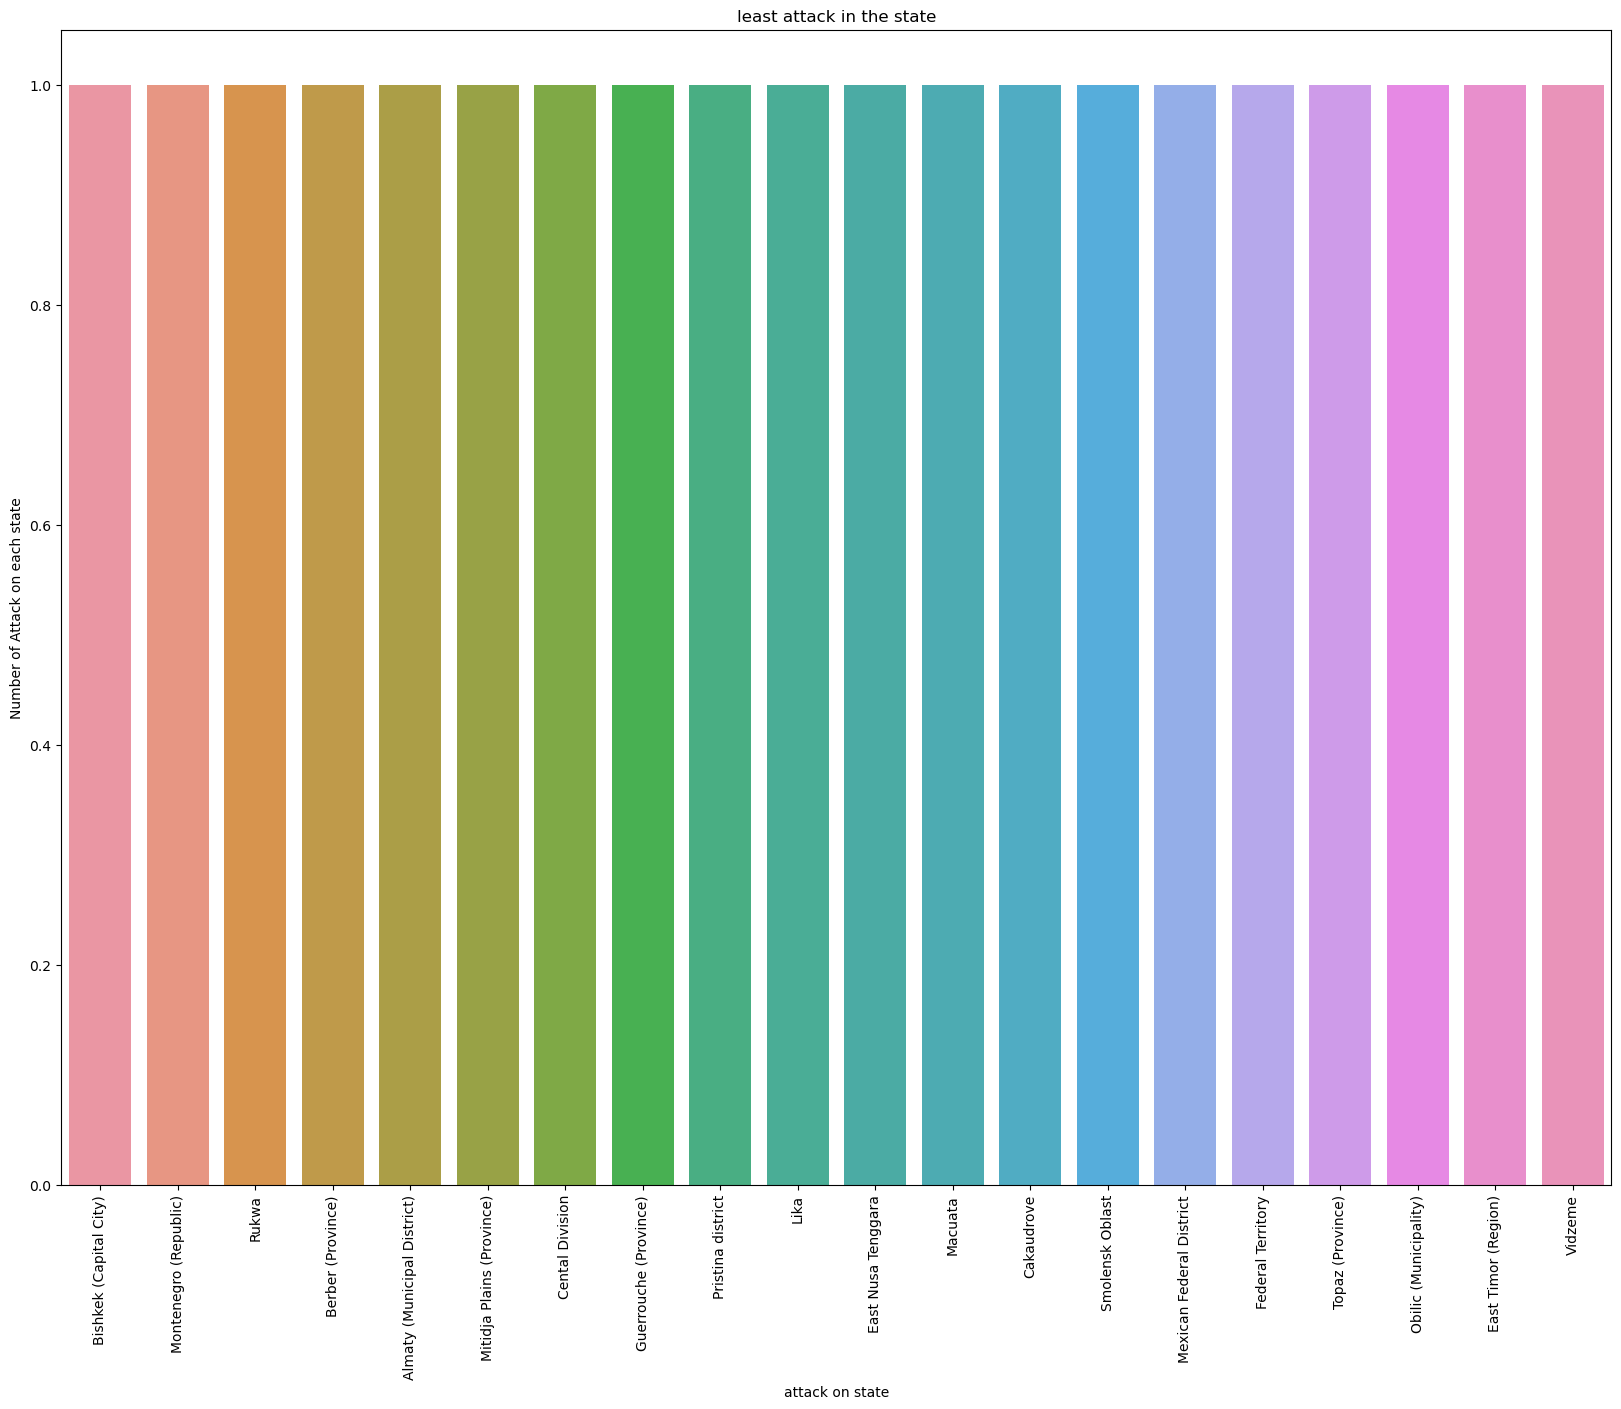

In [29]:
plt.figure(figsize=(20,15));
sns.barplot(x=dataset_updated['state'].value_counts().tail(20).index,y=dataset_updated['state'].value_counts().tail(20).values)
plt.xticks(rotation = 90)
plt.xlabel('attack on state')
plt.ylabel('Number of Attack on each state')
plt.title('least attack in the state')

# Outcomes

1. most attack were happened at Baghdad 7645
2. least attack were happened at various state with 1

In [30]:
dataset_updated['city'].value_counts()[:30].max

<bound method NDFrame._add_numeric_operations.<locals>.max of Unknown           9775
Baghdad           7589
Karachi           2652
Lima              2359
Mosul             2265
Belfast           2171
Santiago          1621
Mogadishu         1581
San Salvador      1558
Istanbul          1048
Athens            1019
Bogota             984
Kirkuk             925
Beirut             918
Medellin           848
Benghazi           840
Peshawar           819
Quetta             803
Guatemala City     755
Baqubah            745
Kabul              738
Srinagar           658
Jerusalem          636
Paris              612
Fallujah           582
Tripoli            565
Dhaka              557
Rome               551
Arish              521
Ramadi             509
Name: city, dtype: int64>

Text(0.5, 1.0, 'Top 20 city that were attacked')

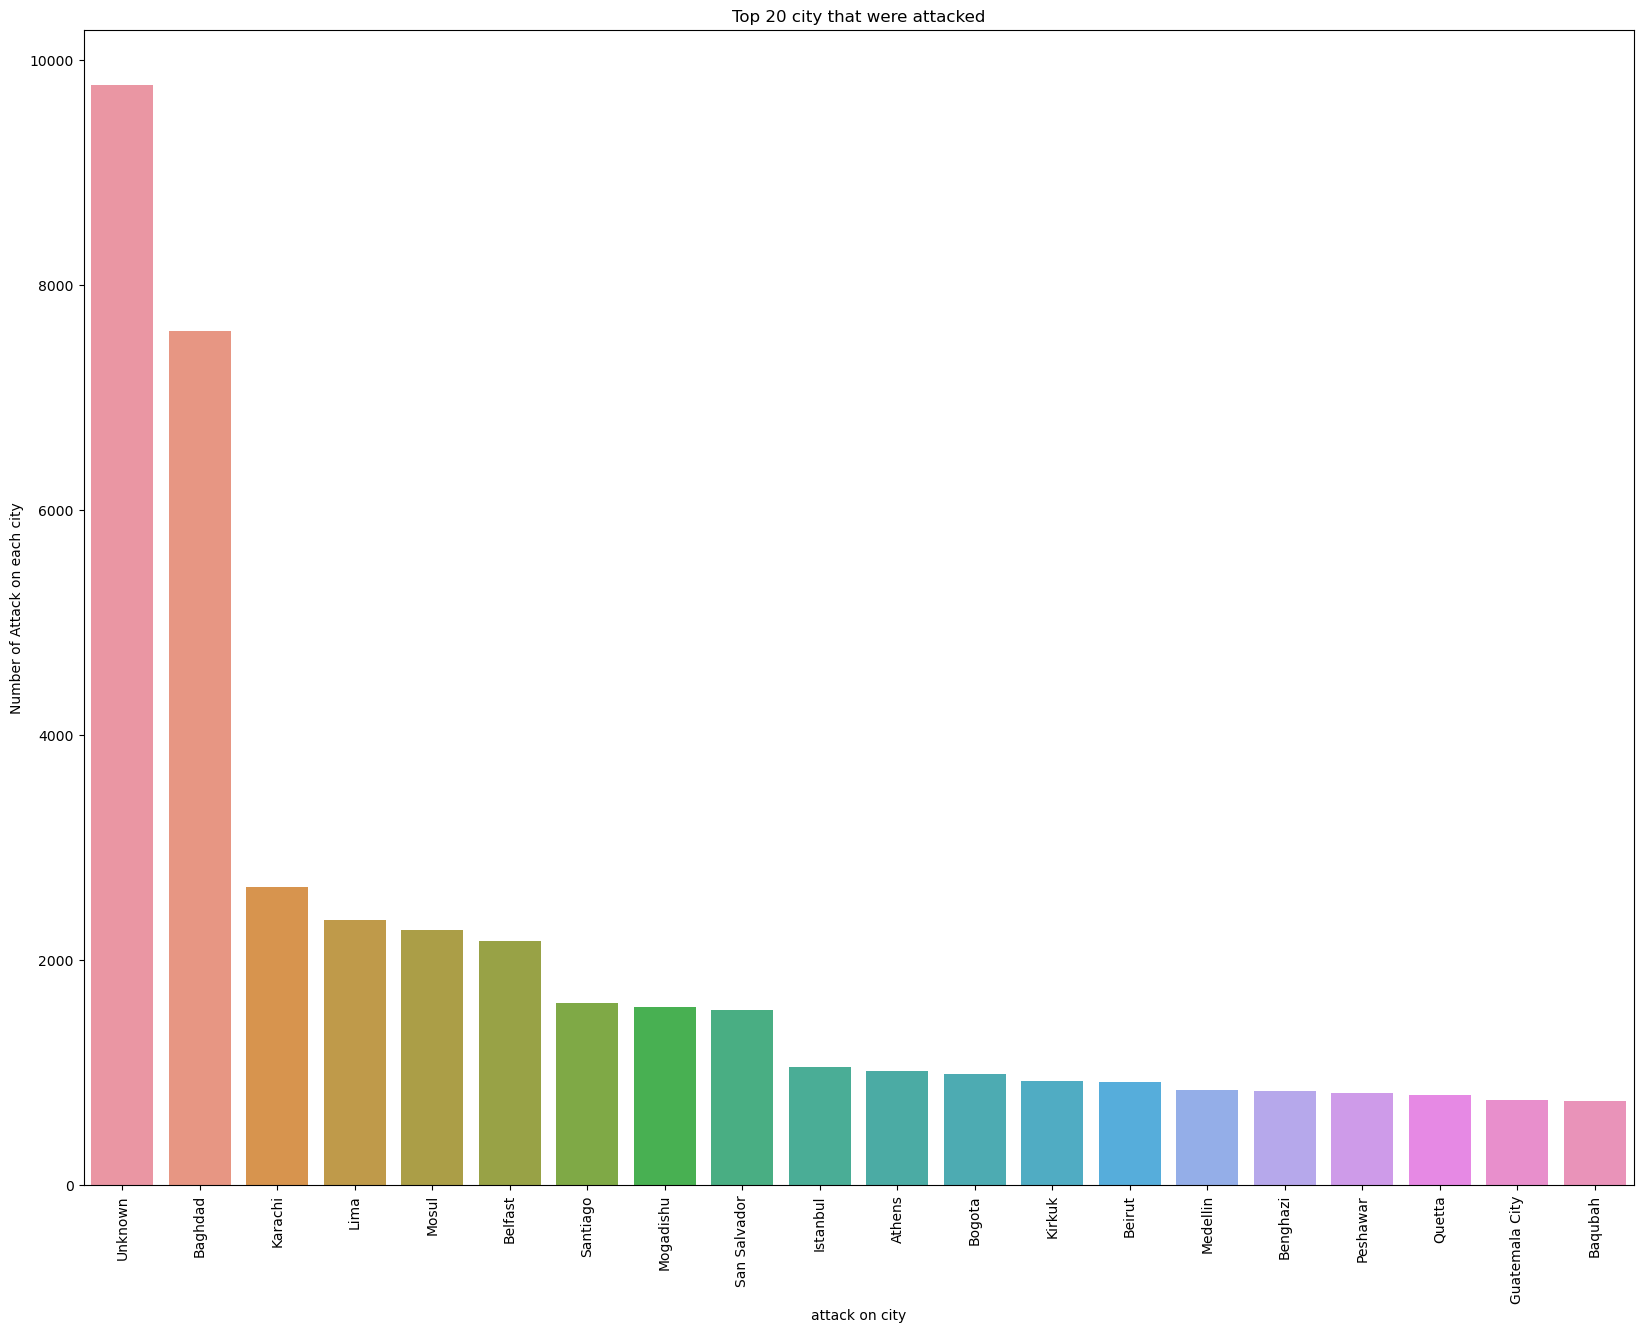

In [31]:
plt.figure(figsize=(20,15));
sns.barplot(x=dataset_updated['city'].value_counts().head(20).index,y=dataset_updated['city'].value_counts().head(20).values)
plt.xticks(rotation = 90)
plt.xlabel('attack on city')
plt.ylabel('Number of Attack on each city')
plt.title('Top 20 city that were attacked')

In [32]:
dataset_updated['city'].value_counts().tail(10).max

<bound method NDFrame._add_numeric_operations.<locals>.max of Mallah            1
Nadia             1
Nittikai Kulam    1
Panchkula         1
Ullensaker        1
Hotwag            1
Ostend            1
Balughata         1
Jikoyi            1
Kubentog          1
Name: city, dtype: int64>

Text(0.5, 1.0, 'least 20 city that were attacked')

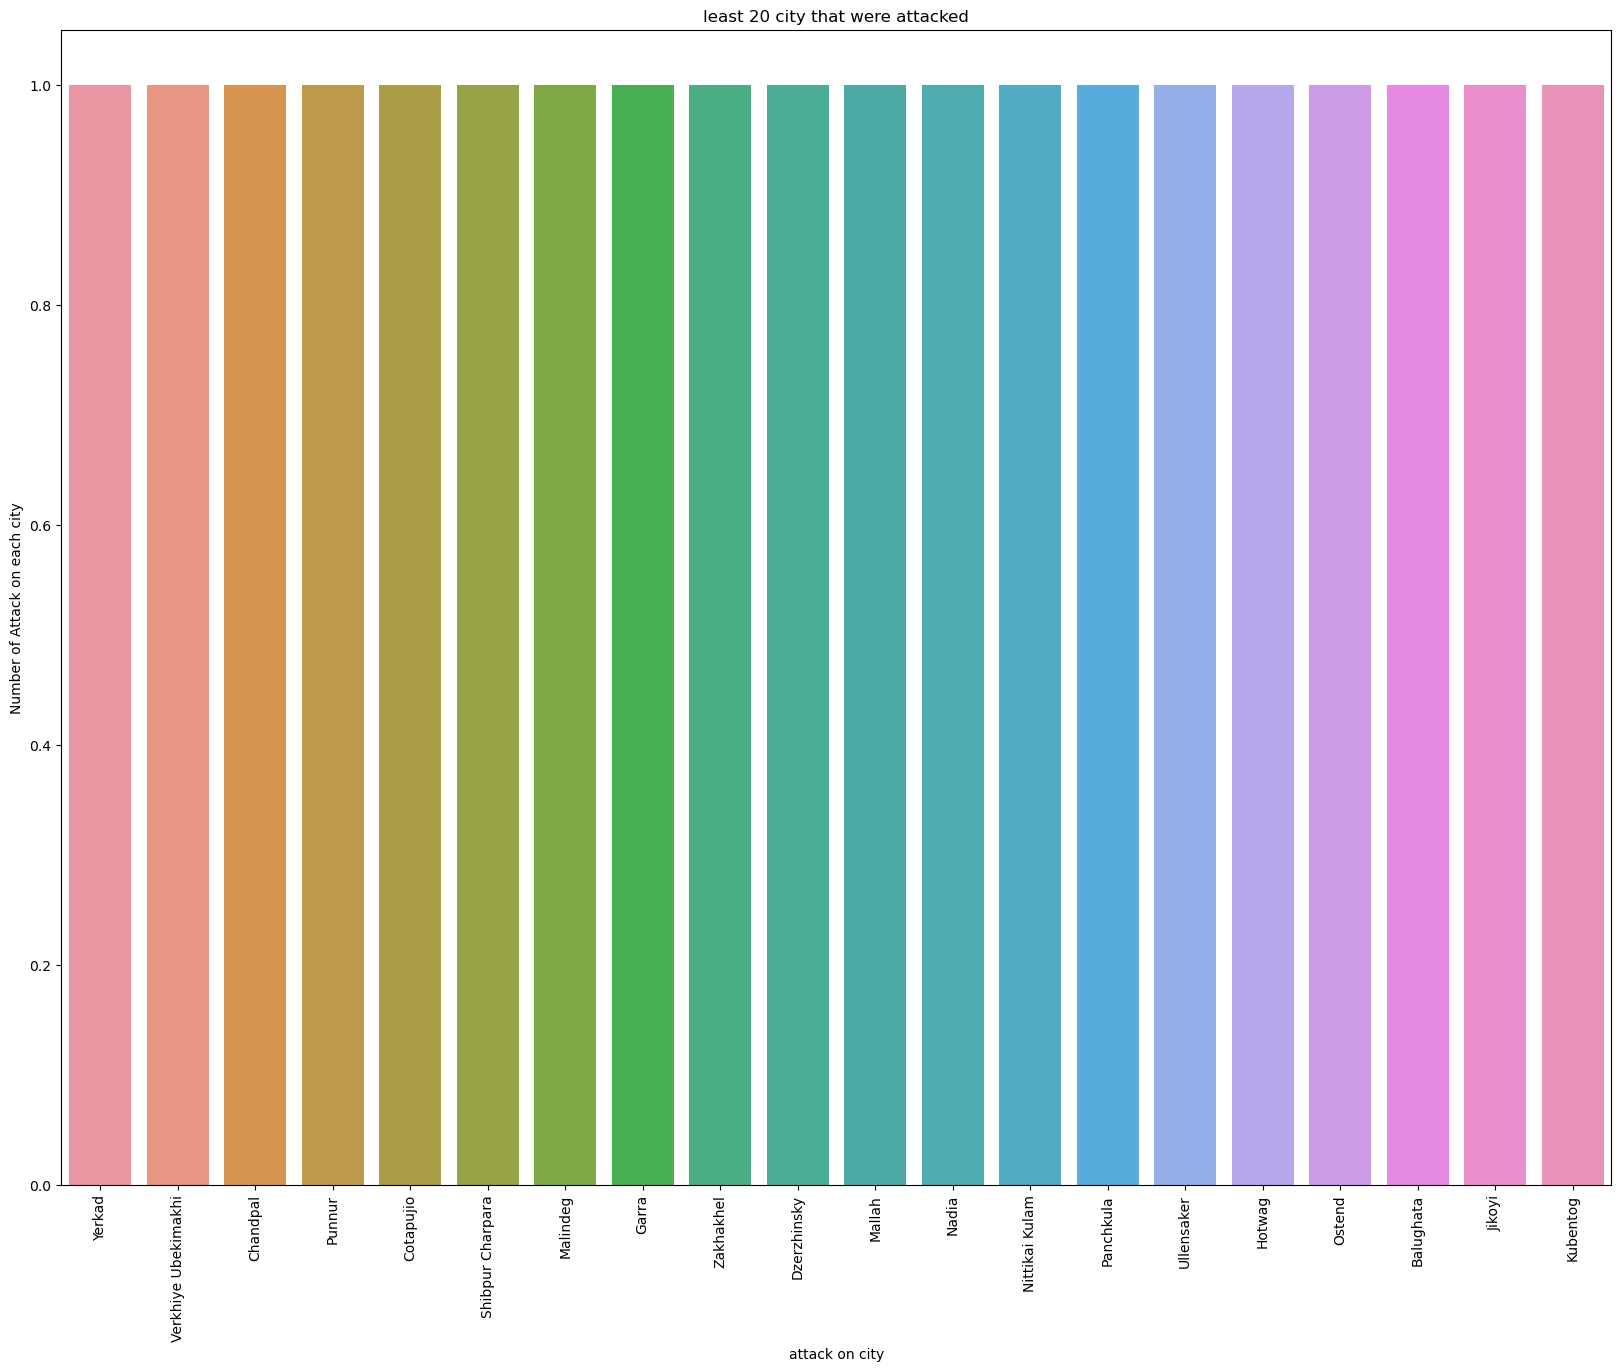

In [33]:
plt.figure(figsize=(20,15));
sns.barplot(x=dataset_updated['city'].value_counts().tail(20).index,y=dataset_updated['city'].value_counts().tail(20).values)
plt.xticks(rotation = 90)
plt.xlabel('attack on city')
plt.ylabel('Number of Attack on each city')
plt.title('least 20 city that were attacked')

# Outcomes

1. Baghdad city were attacked 7589 times
2. there are many city which has least attack with 1 time

In [34]:
#gang
dataset_updated['gang'].value_counts().max

<bound method NDFrame._add_numeric_operations.<locals>.max of Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: gang, Length: 3537, dtype: int64>

Text(0.5, 1.0, 'top 30 gangs of the terrorism')

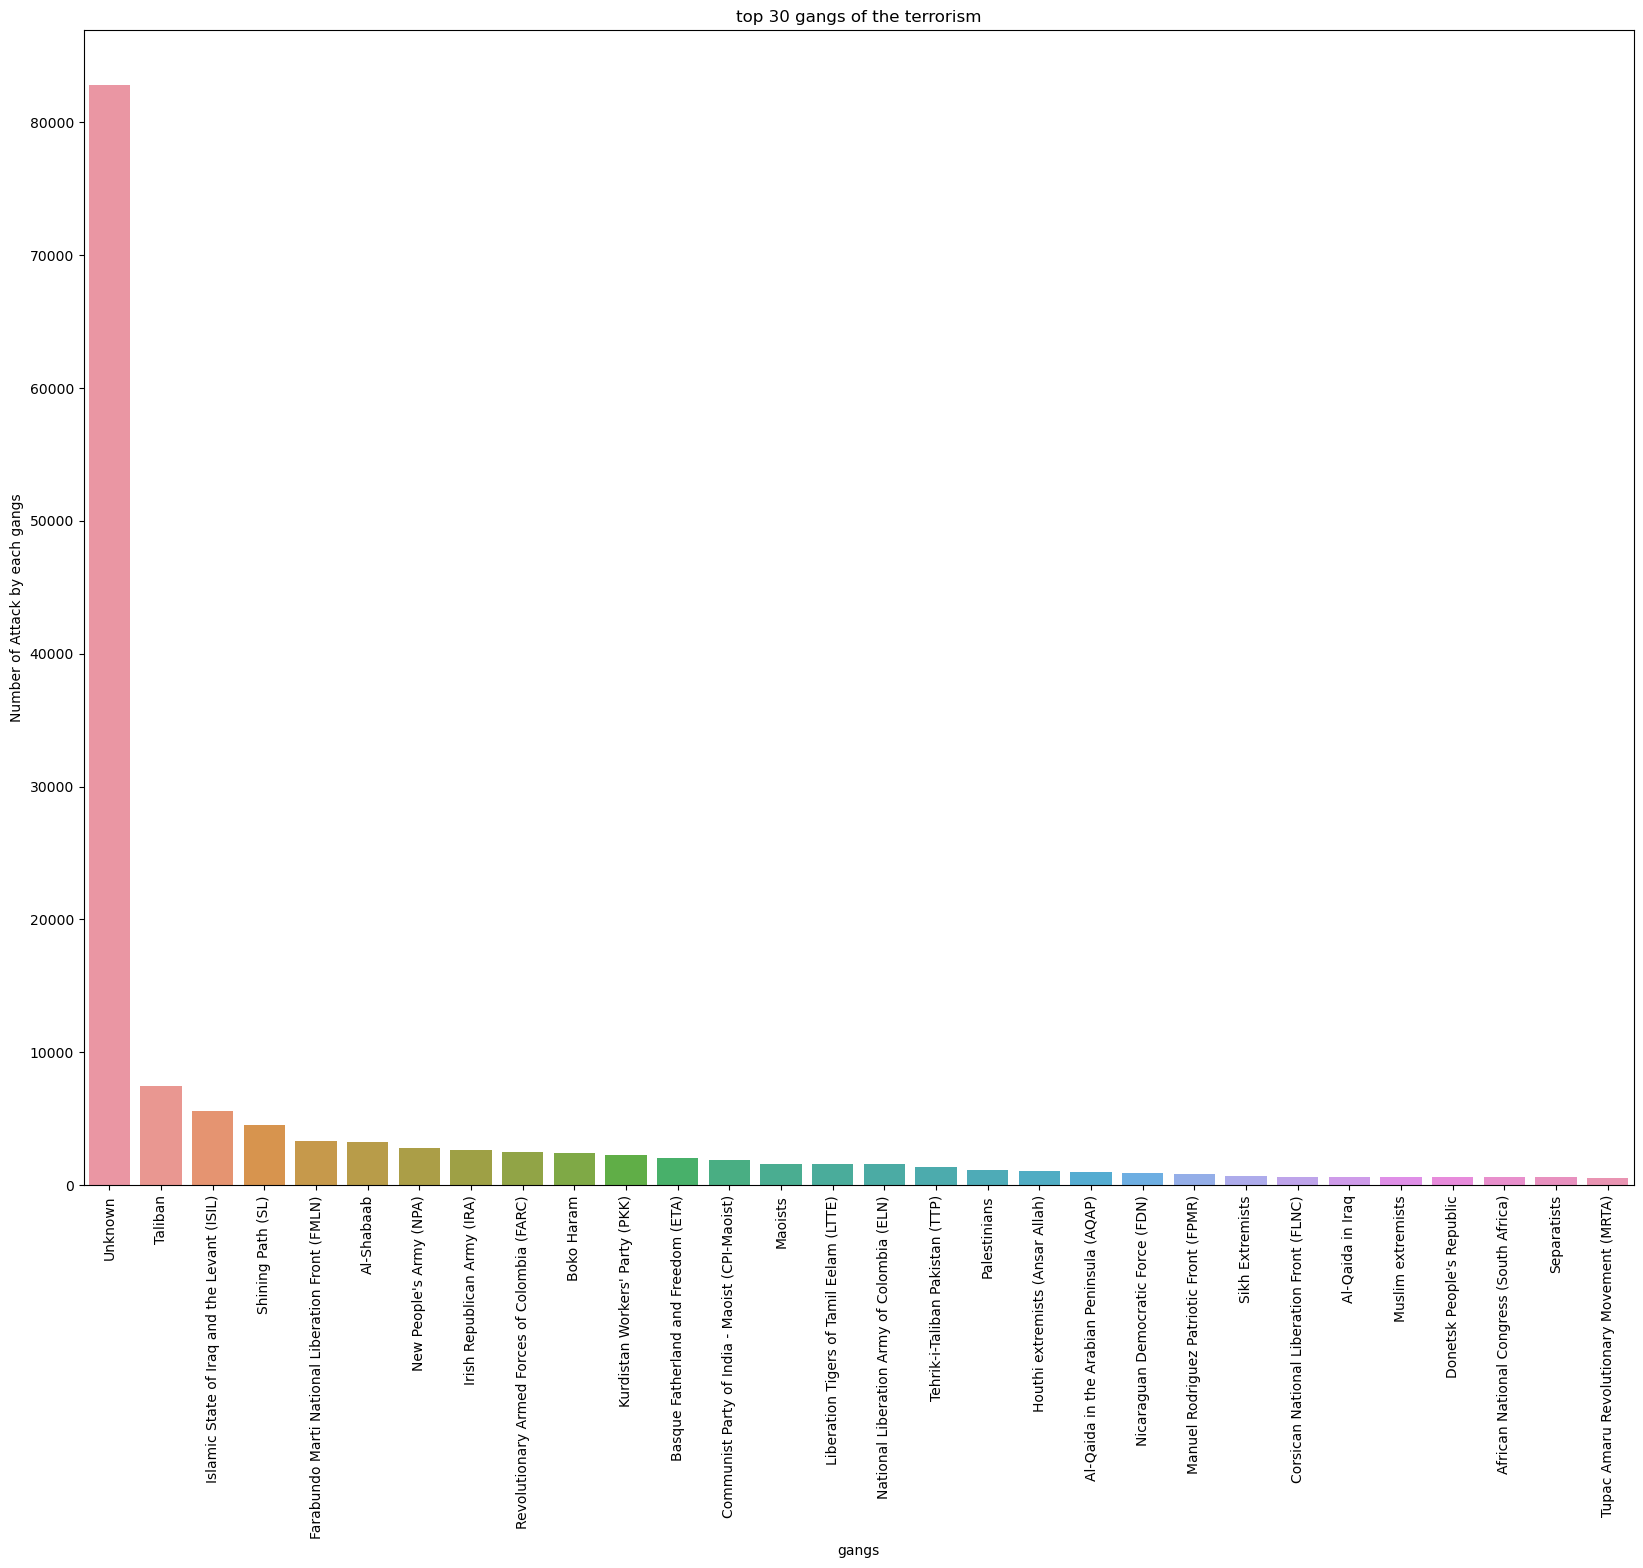

In [35]:
plt.figure(figsize=(20,15));
sns.barplot(x=dataset_updated['gang'].value_counts().head(30).index,y=dataset_updated['gang'].value_counts().head(30).values)
plt.xticks(rotation = 90)
plt.xlabel('gangs')
plt.ylabel('Number of Attack by each gangs')
plt.title('top 30 gangs of the terrorism')

In [36]:
#gang
dataset_updated['gang'].value_counts().tail(30).min

<bound method NDFrame._add_numeric_operations.<locals>.min of Maasai                                                     1
Al-Marabitun Revolutionary Committee                       1
Salah al-Din Squad                                         1
Supporters of Ernest Wamba dia Wamba                       1
New Revolutionary Alternative (NRA)                        1
National Army for the Liberation of Uganda (NALU)          1
People's Sovereignty Party (PDR)                           1
People's Command                                           1
Islamic Liberation Organization                            1
Anti-American Arab Liberation Front                        1
White Wolves (UK)                                          1
Red Line                                                   1
Anti-Racist Guerrilla Nuclei                               1
CSS Movement                                               1
Anti-Imperialist Commando                                  1
Association of Mobil Sp

Text(0.5, 1.0, '30 least gangs of the terrorism')

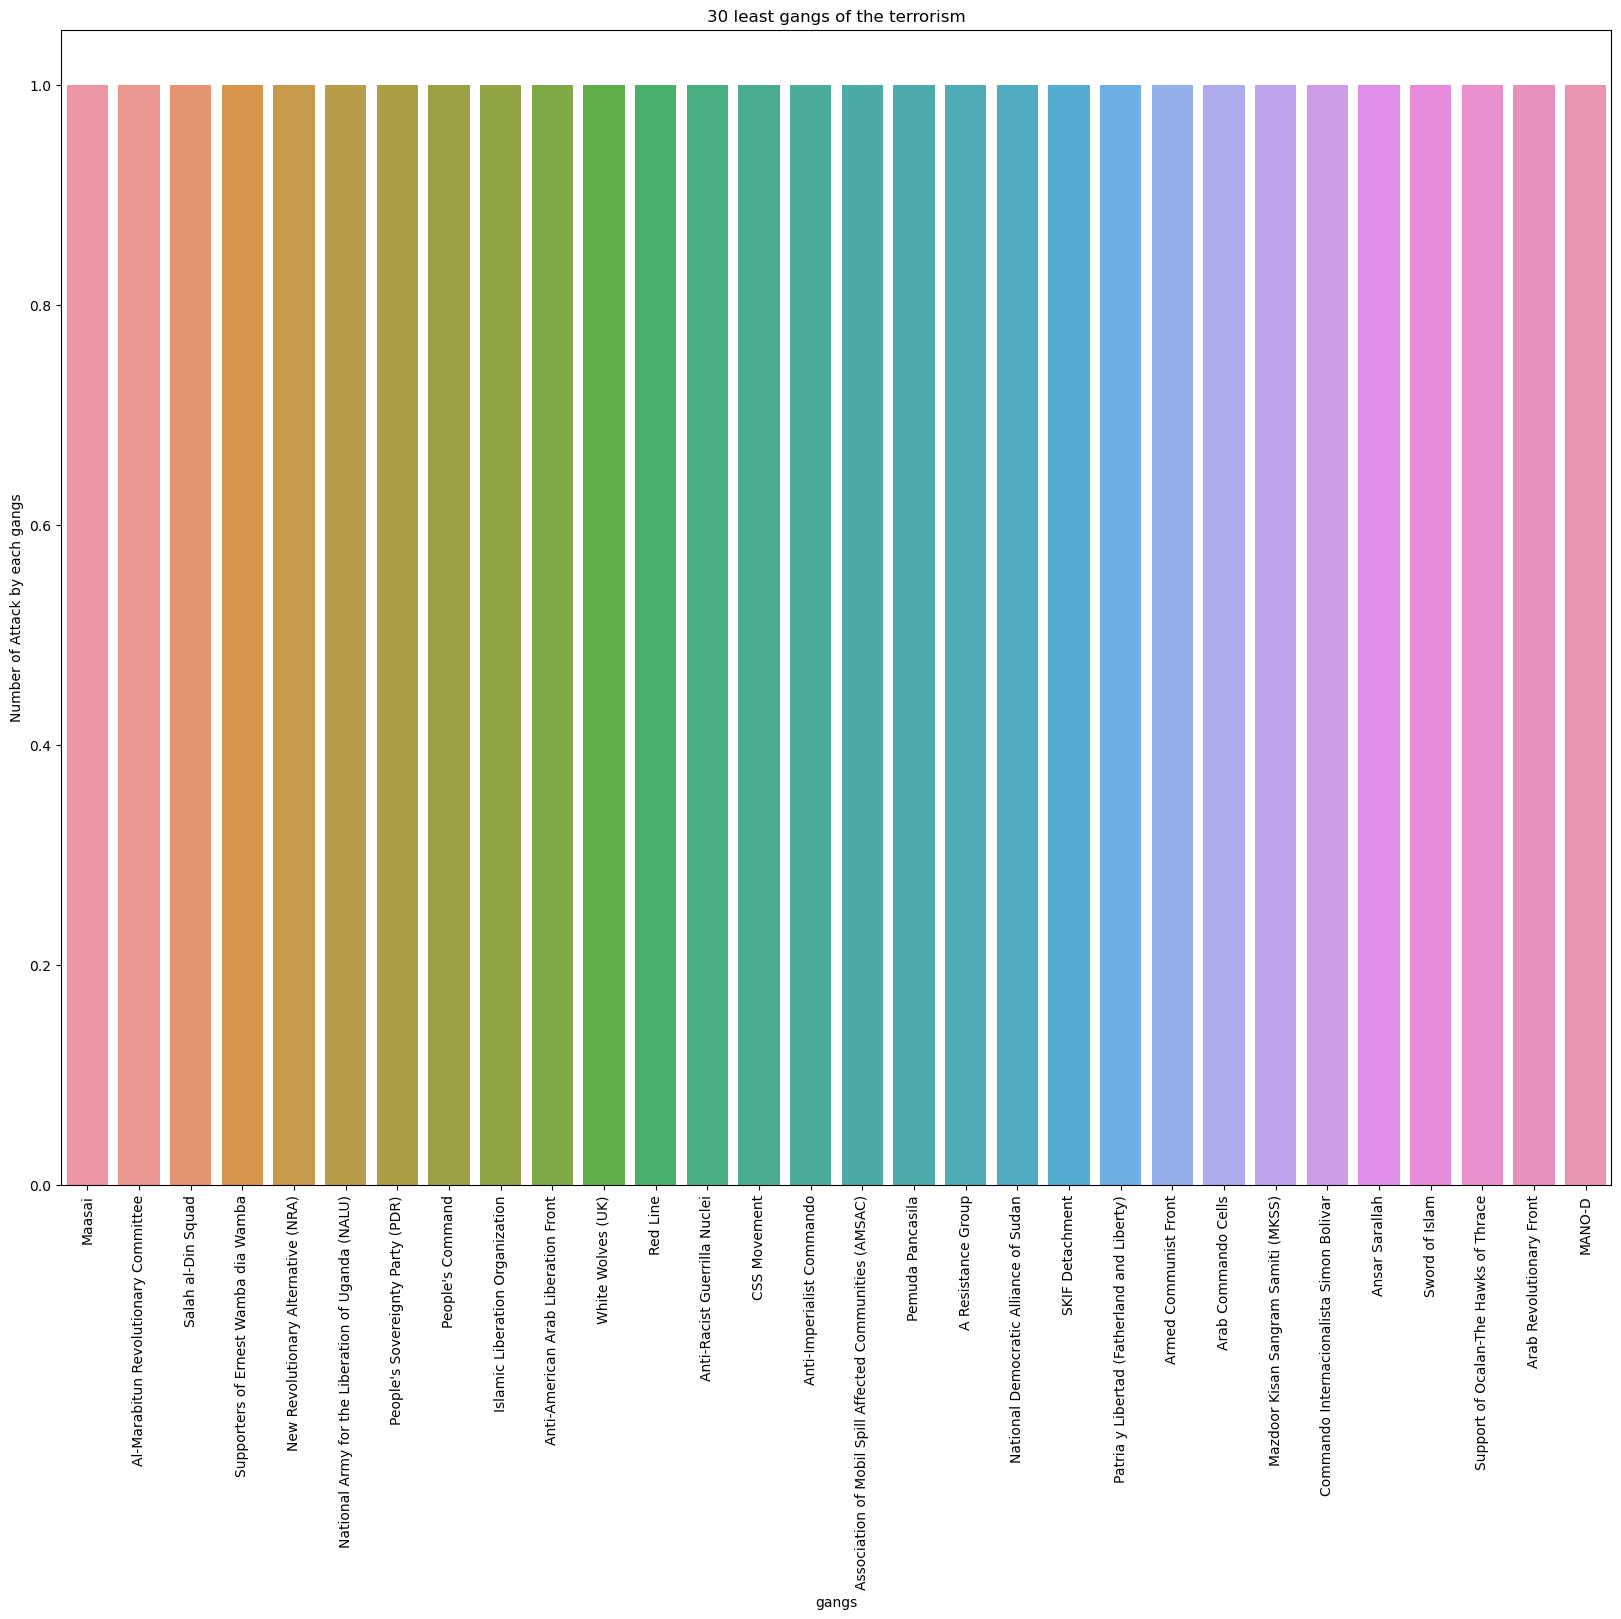

In [37]:
plt.figure(figsize=(20,15));
sns.barplot(x=dataset_updated['gang'].value_counts().tail(30).index,y=dataset_updated['gang'].value_counts().tail(30).values)
plt.xticks(rotation = 90)
plt.xlabel('gangs')
plt.ylabel('Number of Attack by each gangs')
plt.title('30 least gangs of the terrorism')

# Outcomes

1. most attack were happened by gang taliban 7478
2. least attack were happenedby gang is 1

In [38]:
dataset_updated['target_type'].unique()
dataset_updated['target_type'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: target_type, dtype: int64

Text(0.5, 1.0, 'target_type')

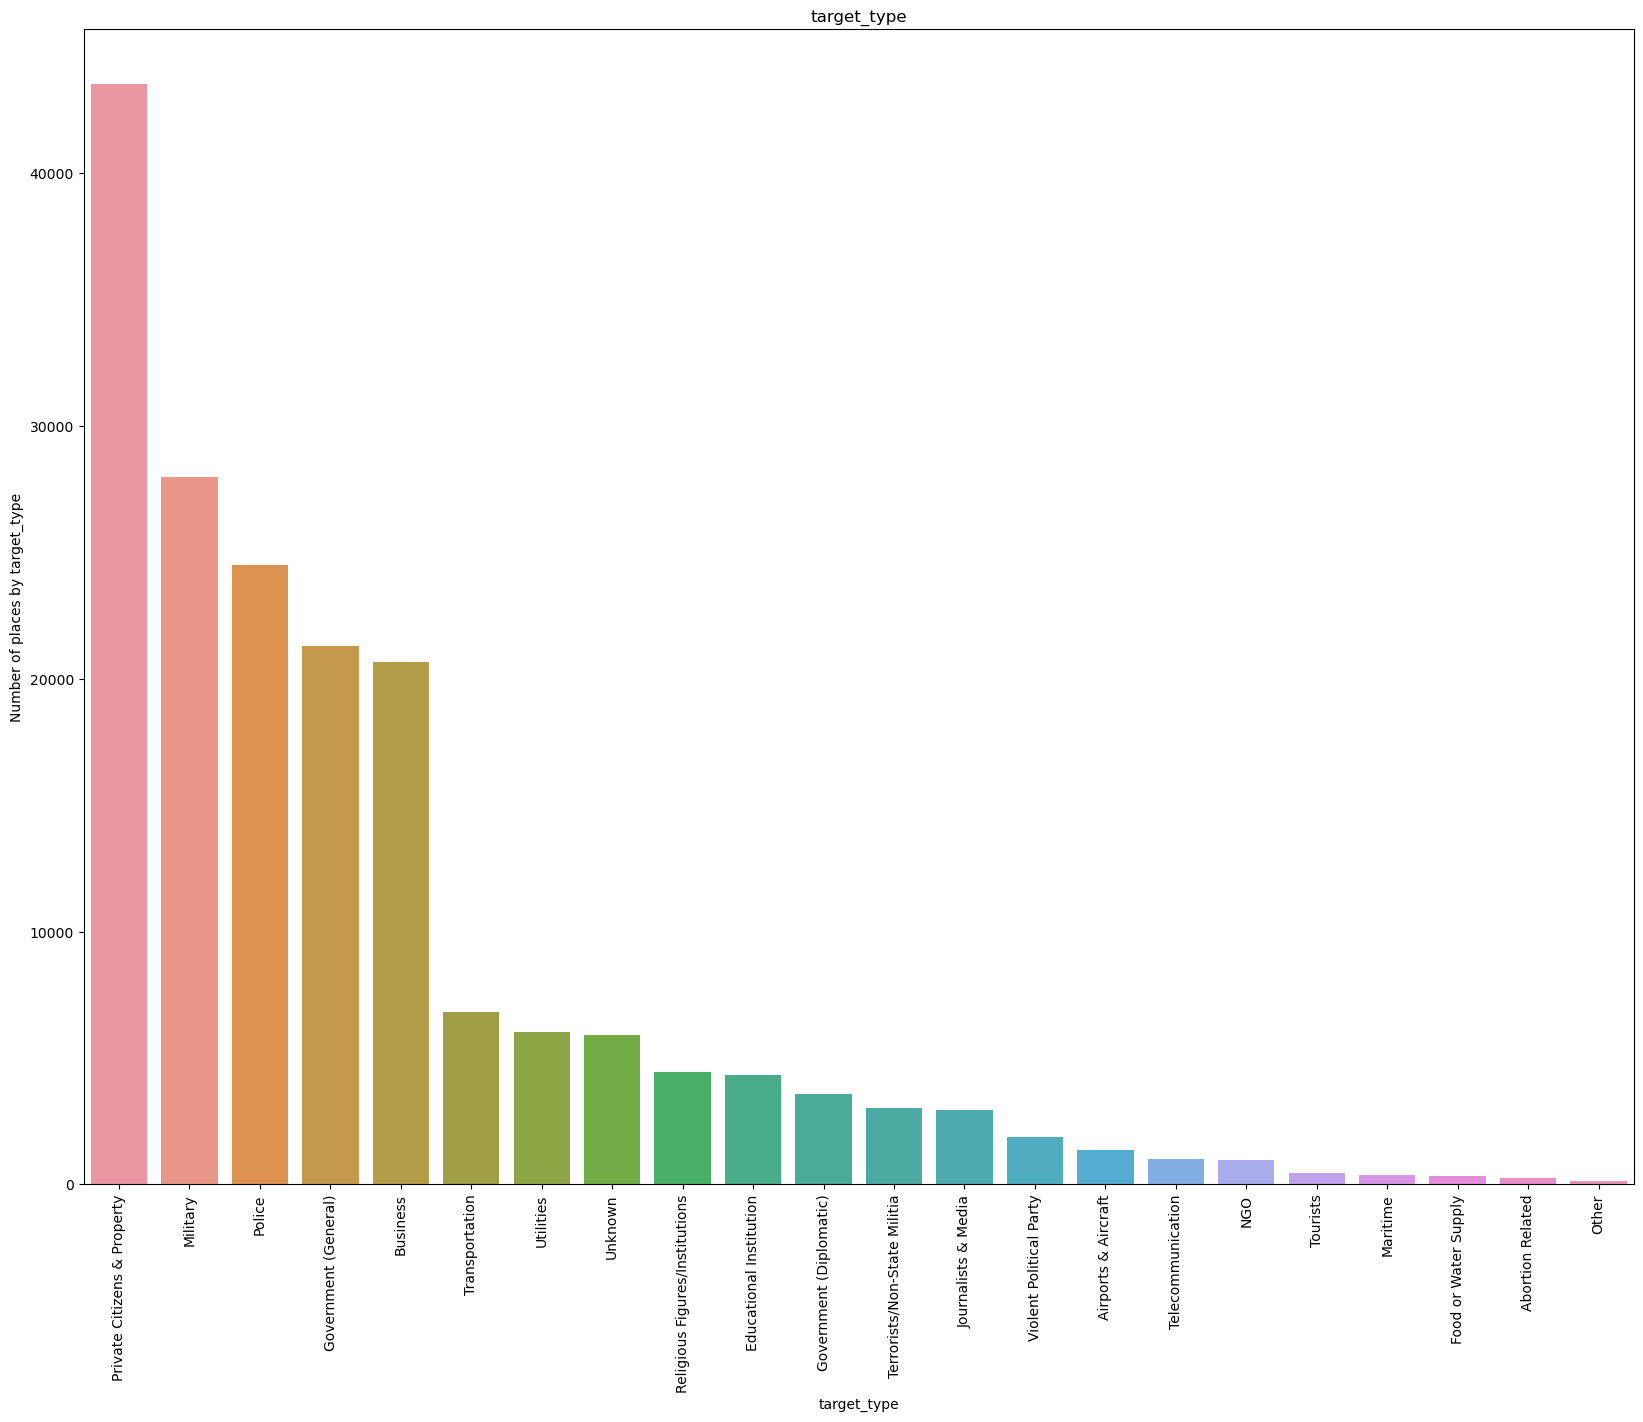

In [39]:
plt.figure(figsize=(20,15));
sns.barplot(x=dataset_updated['target_type'].value_counts().index,y=dataset_updated['target_type'].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel('target_type')
plt.ylabel('Number of places by target_type')
plt.title('target_type')

Text(0.5, 1.0, 'target_name')

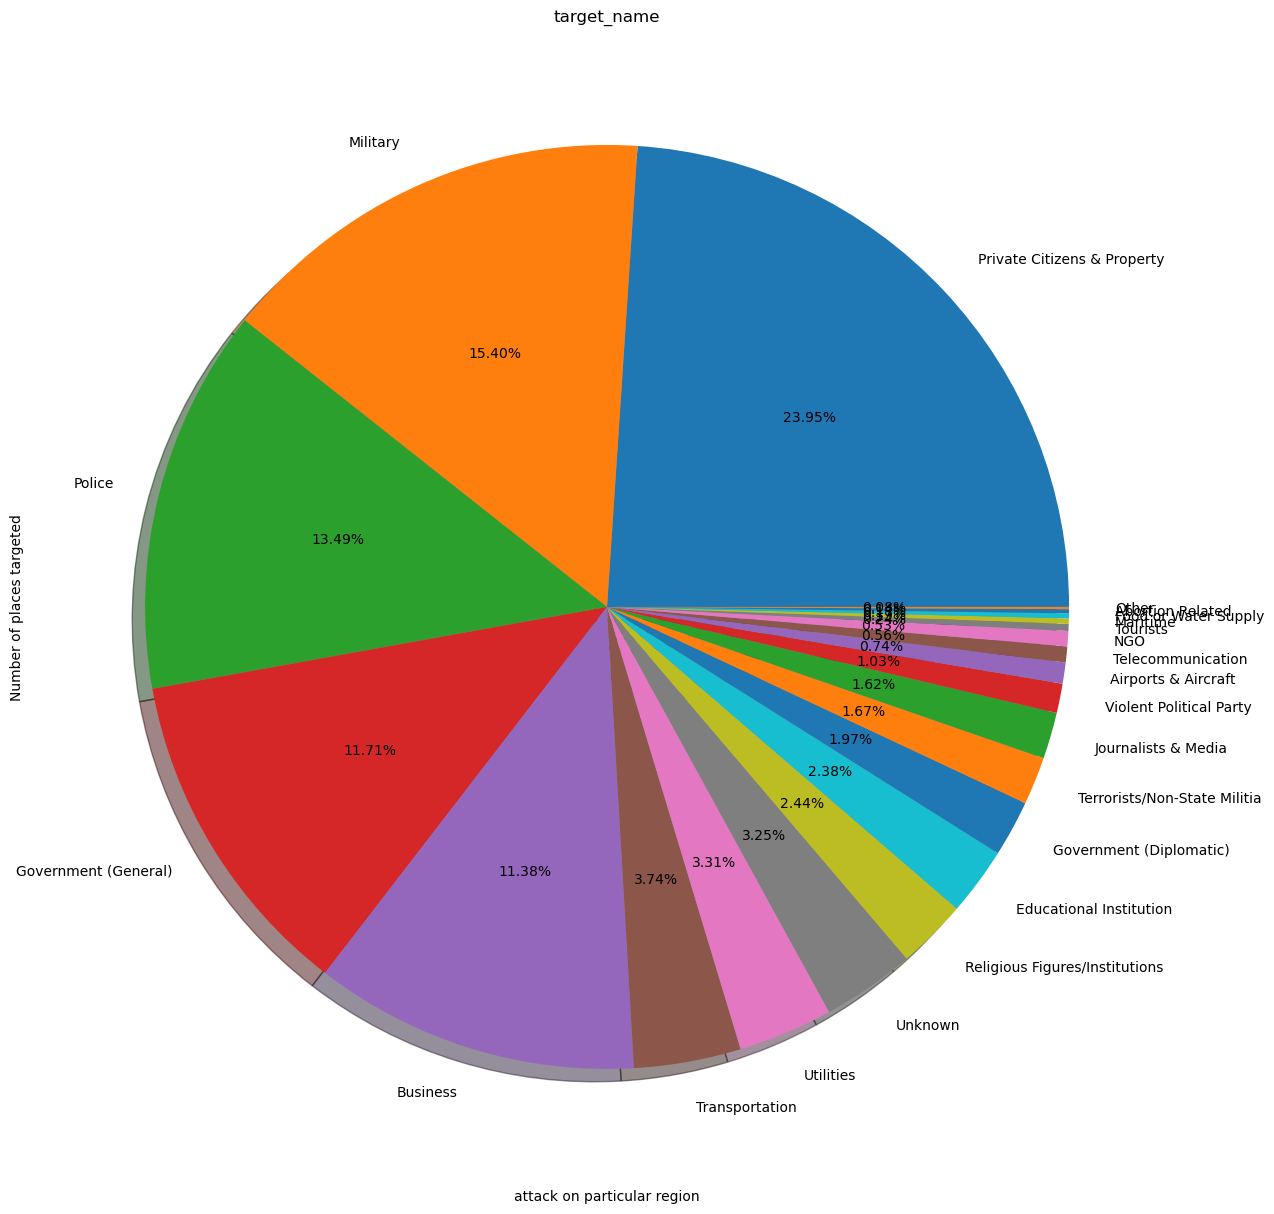

In [40]:

plt.figure(figsize=(90,15));
dataset_updated['target_type'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%')

plt.xlabel('attack on particular region')
plt.ylabel('Number of places targeted')
plt.title('target_name')

# Outcomes

1. most properties damage were Private Citizens & Property with 23.95%
2. least properties damage were others with 0.08%

In [41]:
#attack type
dataset_updated['attack_type'].unique()
dataset_updated['attack_type'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attack_type, dtype: int64

Text(0.5, 1.0, 'attack_type')

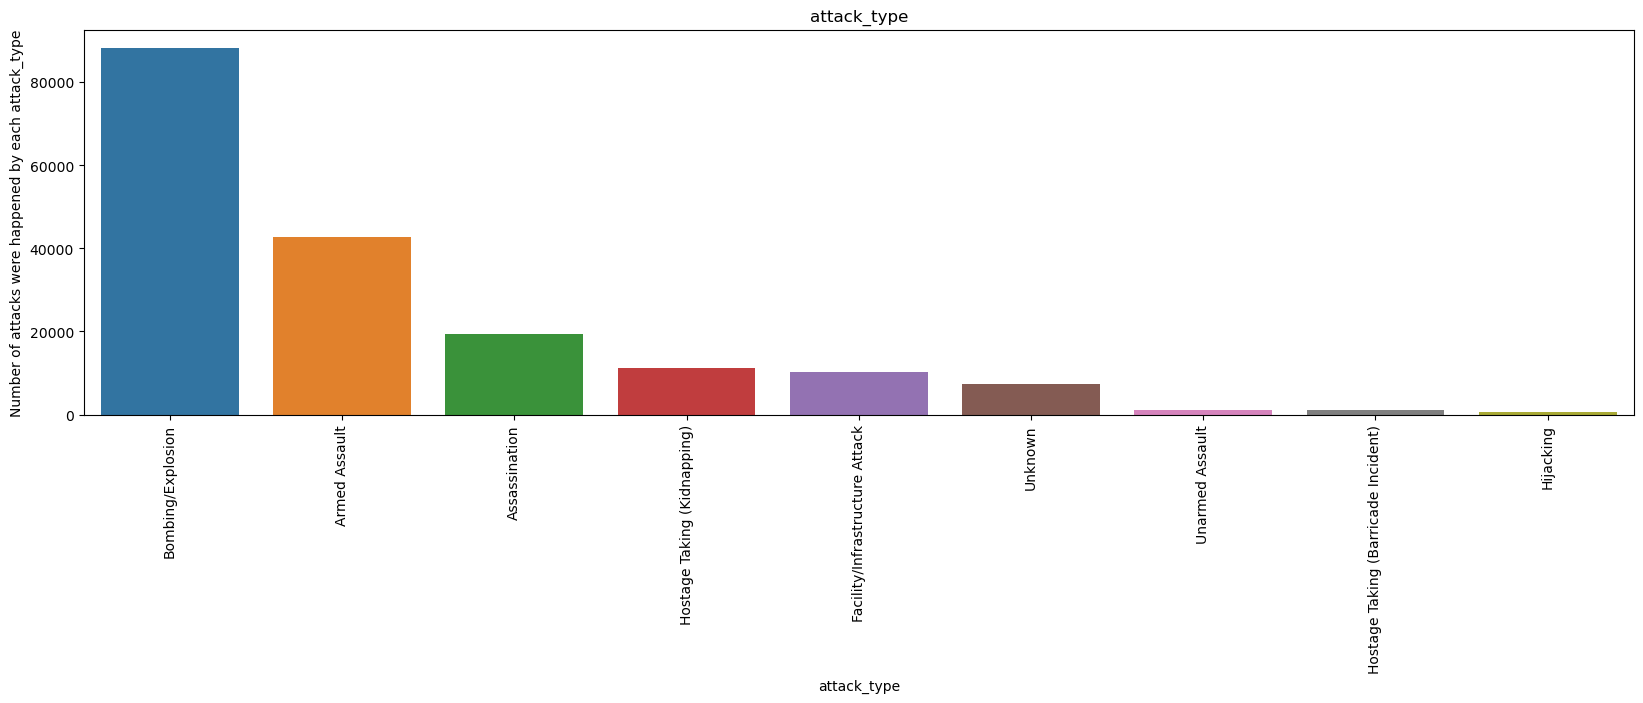

In [42]:
plt.figure(figsize=(20,5));
sns.barplot(x=dataset_updated['attack_type'].value_counts().index,y=dataset_updated['attack_type'].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel('attack_type')
plt.ylabel('Number of attacks were happened by each attack_type')
plt.title('attack_type')

Text(0.5, 1.0, 'attack_type')

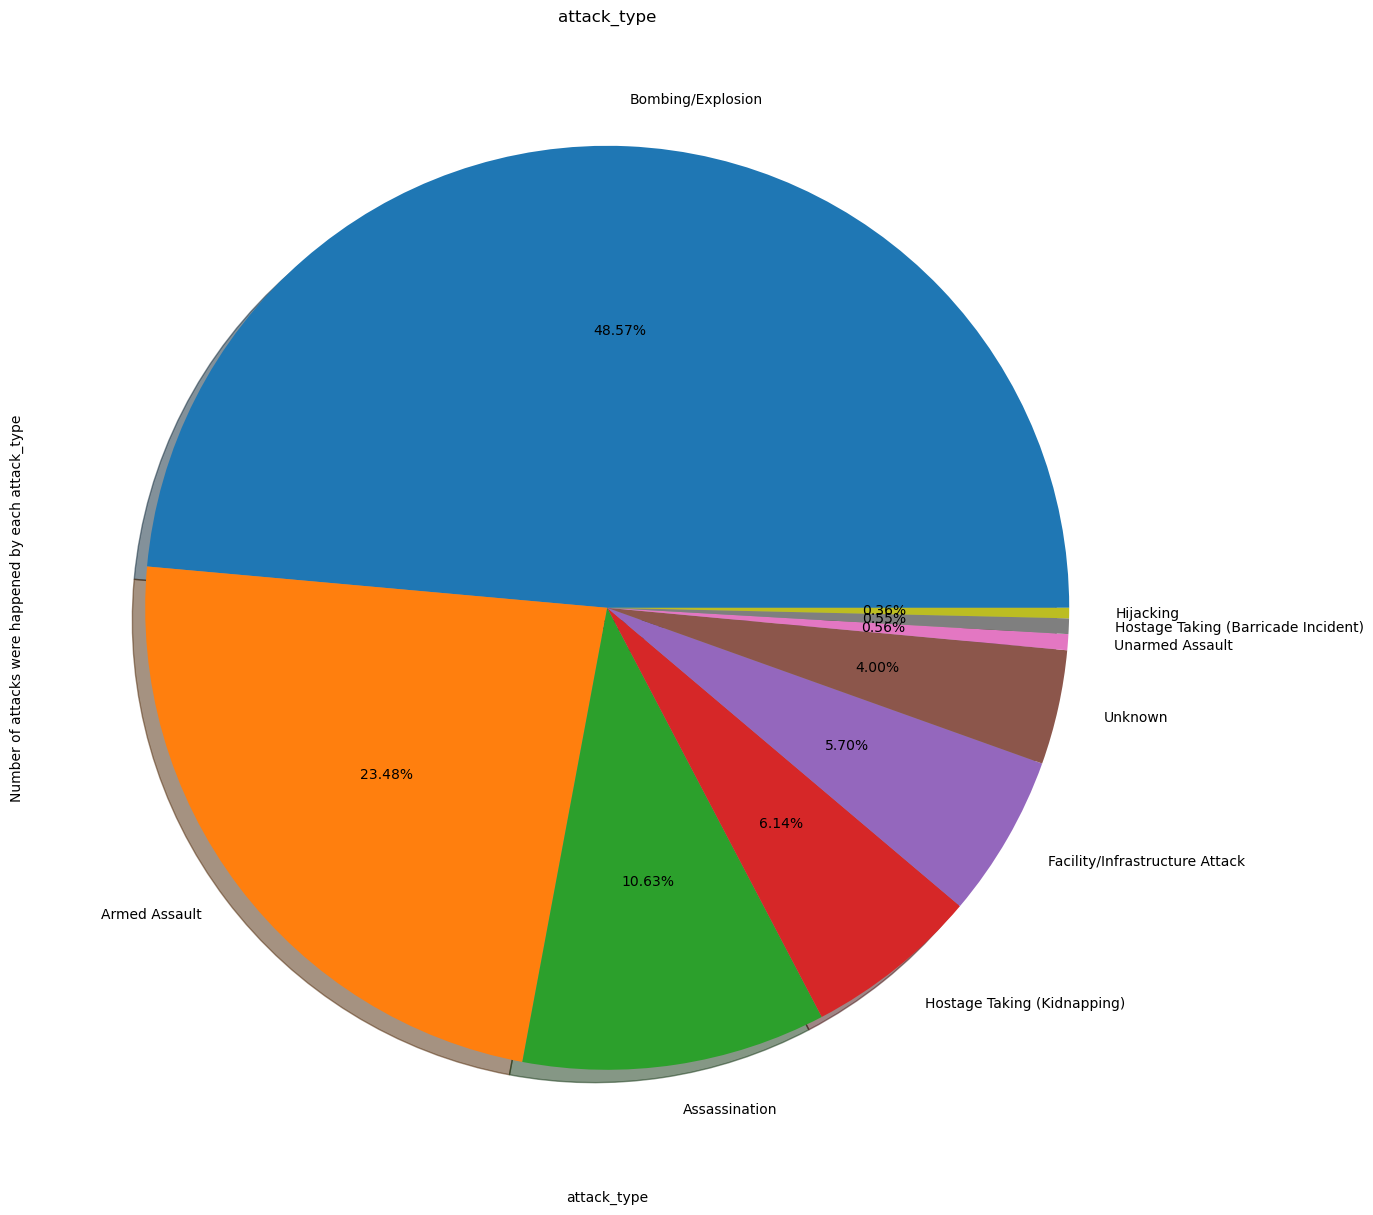

In [43]:
plt.figure(figsize=(90,15));
dataset_updated['attack_type'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%')

plt.xlabel('attack_type')
plt.ylabel('Number of attacks were happened by each attack_type')
plt.title('attack_type')

# Outcomes

1. most preffered attack type is Bombing/Explosion with 48.57%
2. least preffered attack type is hijacking with 0.36%

In [44]:
#attack type
dataset_updated['weapon_type'].unique()
dataset_updated['weapon_type'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

Text(0.5, 1.0, 'weapon_type')

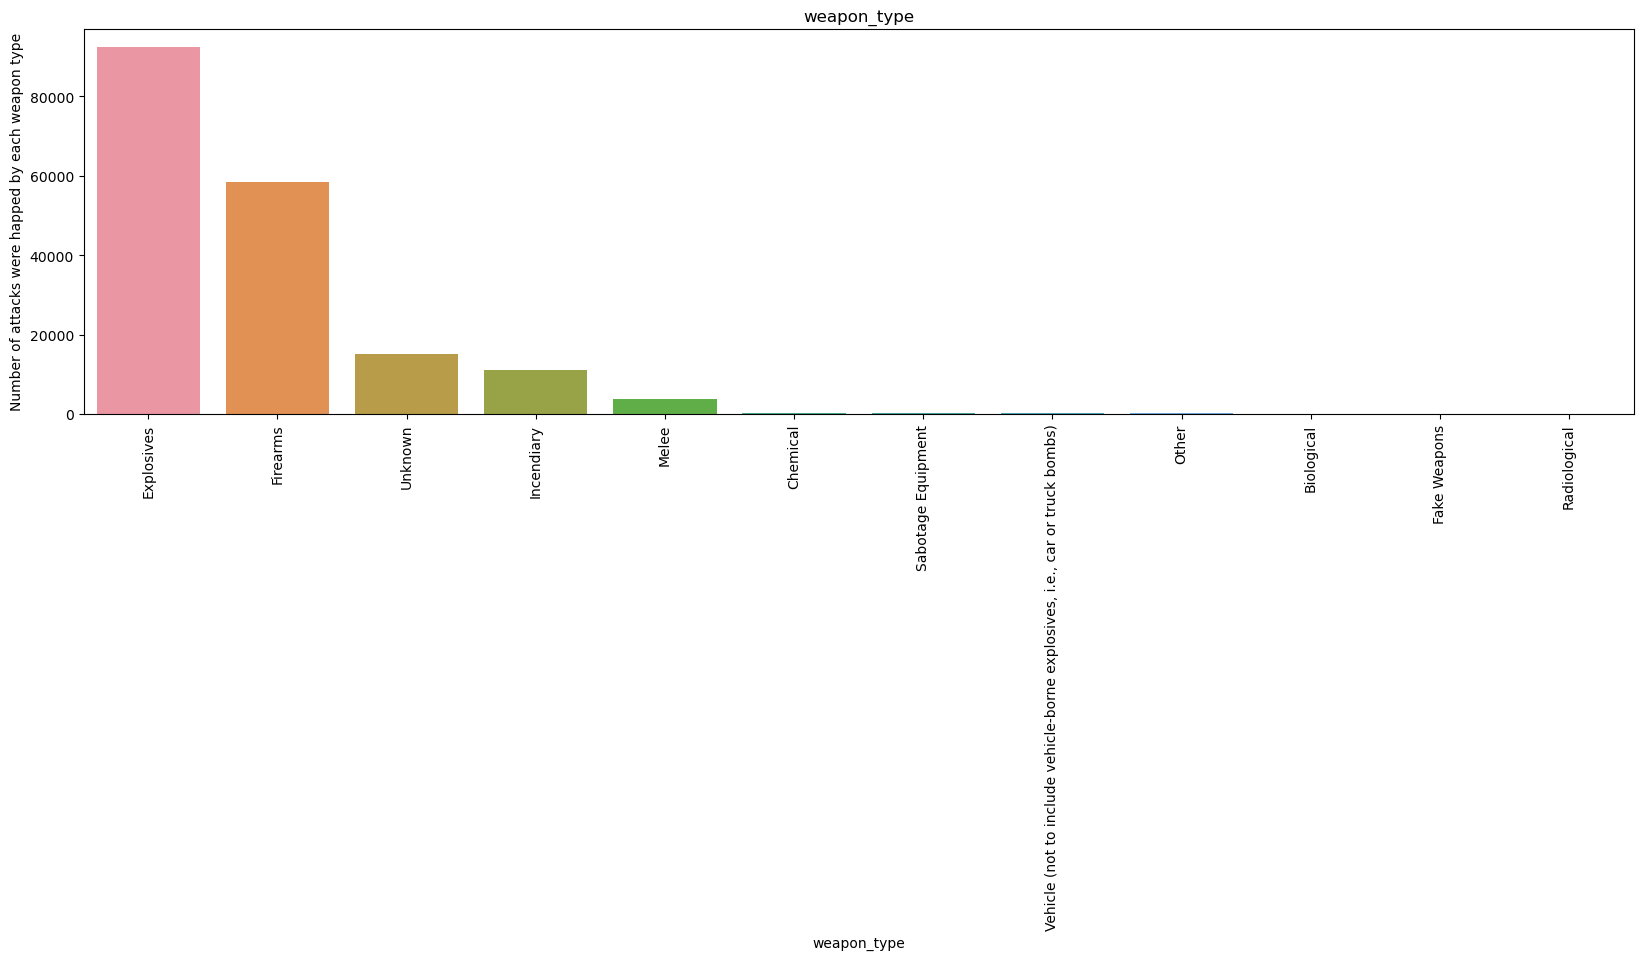

In [45]:
plt.figure(figsize=(20,5));
sns.barplot(x=dataset_updated['weapon_type'].value_counts().index,y=dataset_updated['weapon_type'].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel('weapon_type')
plt.ylabel('Number of attacks were happed by each weapon type')
plt.title('weapon_type')

Text(0.5, 1.0, 'weapon_type')

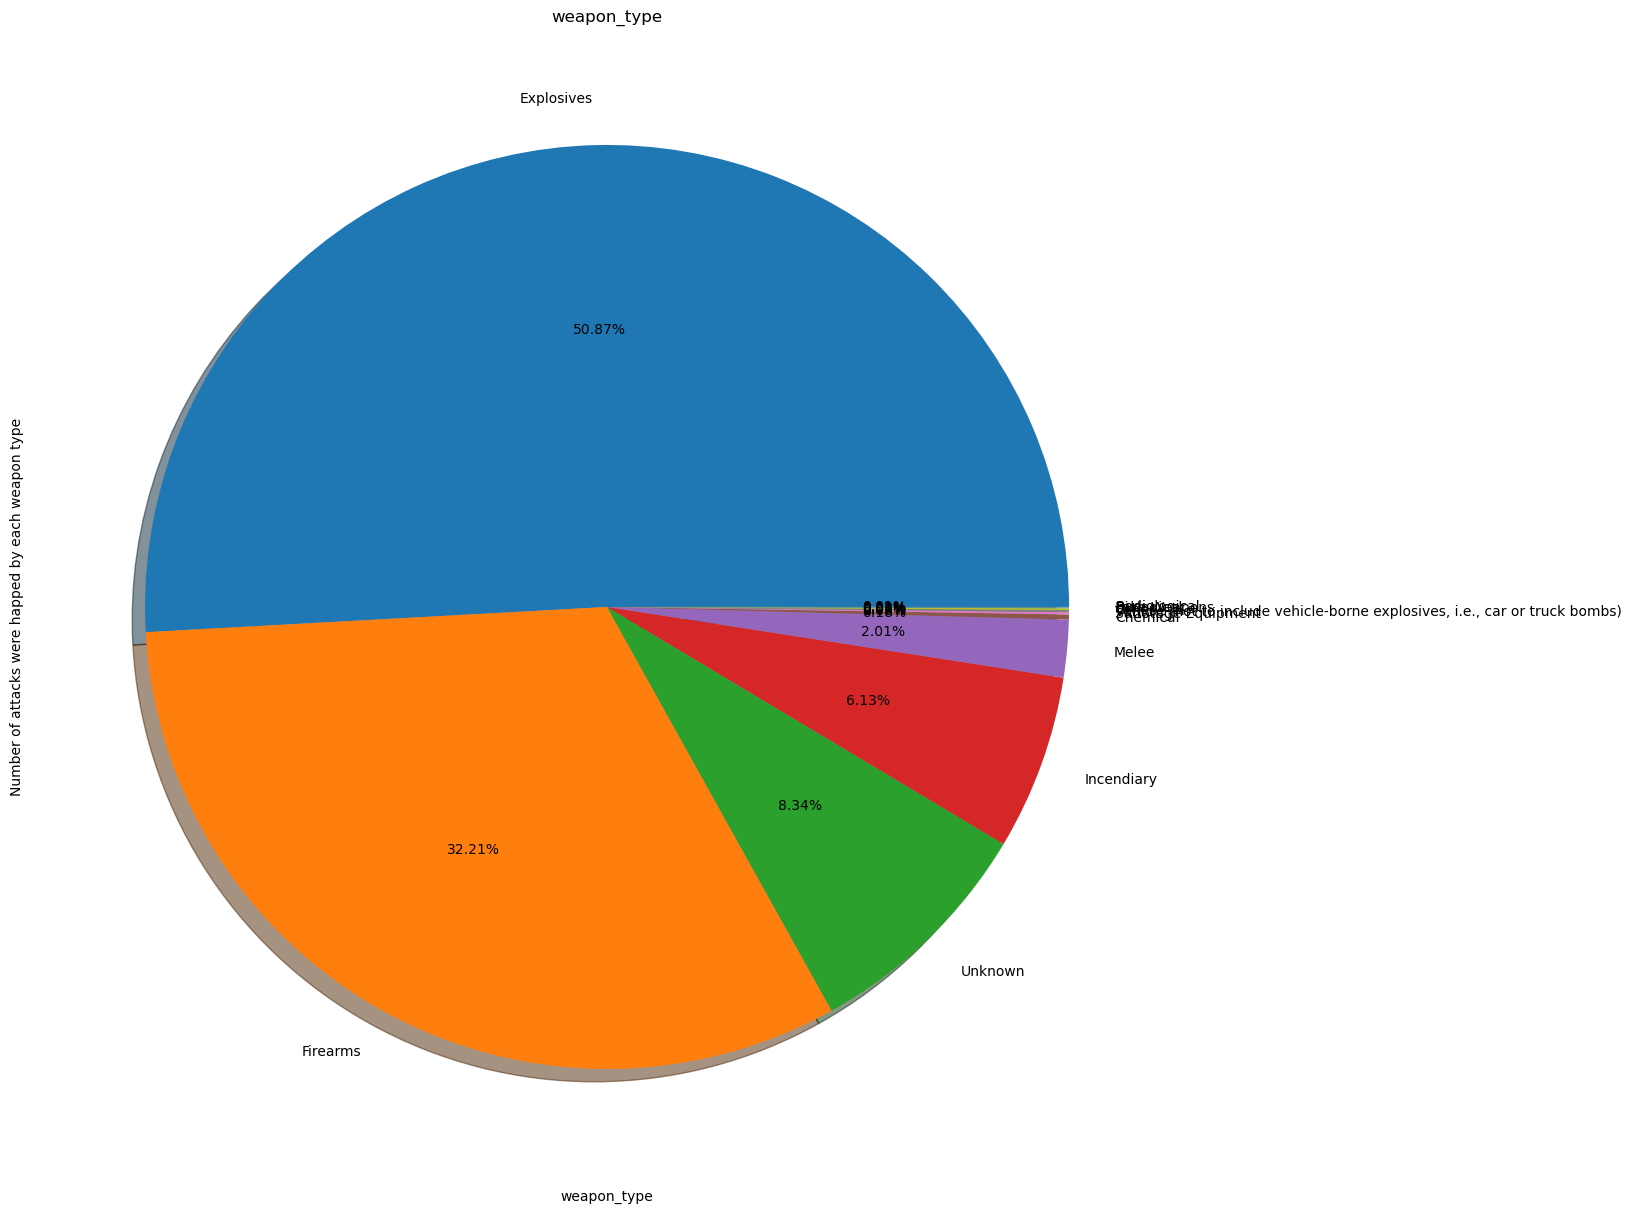

In [46]:
plt.figure(figsize=(90,15));
dataset_updated['weapon_type'].value_counts().plot.pie(shadow=True,autopct='%1.2f%%')
plt.xlabel('weapon_type')
plt.ylabel('Number of attacks were happed by each weapon type')
plt.title('weapon_type')


# Outcomes

1. most preffered weapon type is Explosives with 50.87%
2. least preffered weapon type is radiological with 0.08%

# data analysis for india

In [47]:
#attack type
dataset_updated[dataset_updated['country_name']=='India']['state'].unique()

dataset_updated[dataset_updated['country_name']=='India']['state'].value_counts()

Jammu and Kashmir    2454
Assam                1151
Manipur              1100
Chhattisgarh          979
Punjab                949
Jharkhand             887
Bihar                 688
West Bengal           650
Odisha                428
Maharashtra           302
Meghalaya             294
Andhra Pradesh        251
Orissa                221
Delhi                 208
Uttar Pradesh         201
Tamil Nadu            164
Unknown               157
Tripura               117
Nagaland              115
Kerala                 98
Gujarat                85
Madhya Pradesh         75
Karnataka              71
Haryana                50
Chandigarh             47
Rajasthan              43
Andhra pradesh         41
Mizoram                27
Uttaranchal            24
Himachal Pradesh       24
Arunachal Pradesh      24
Telangana              24
Goa                     5
Sikkim                  4
Puducherry              2
Name: state, dtype: int64

Text(0.5, 1.0, 'india')

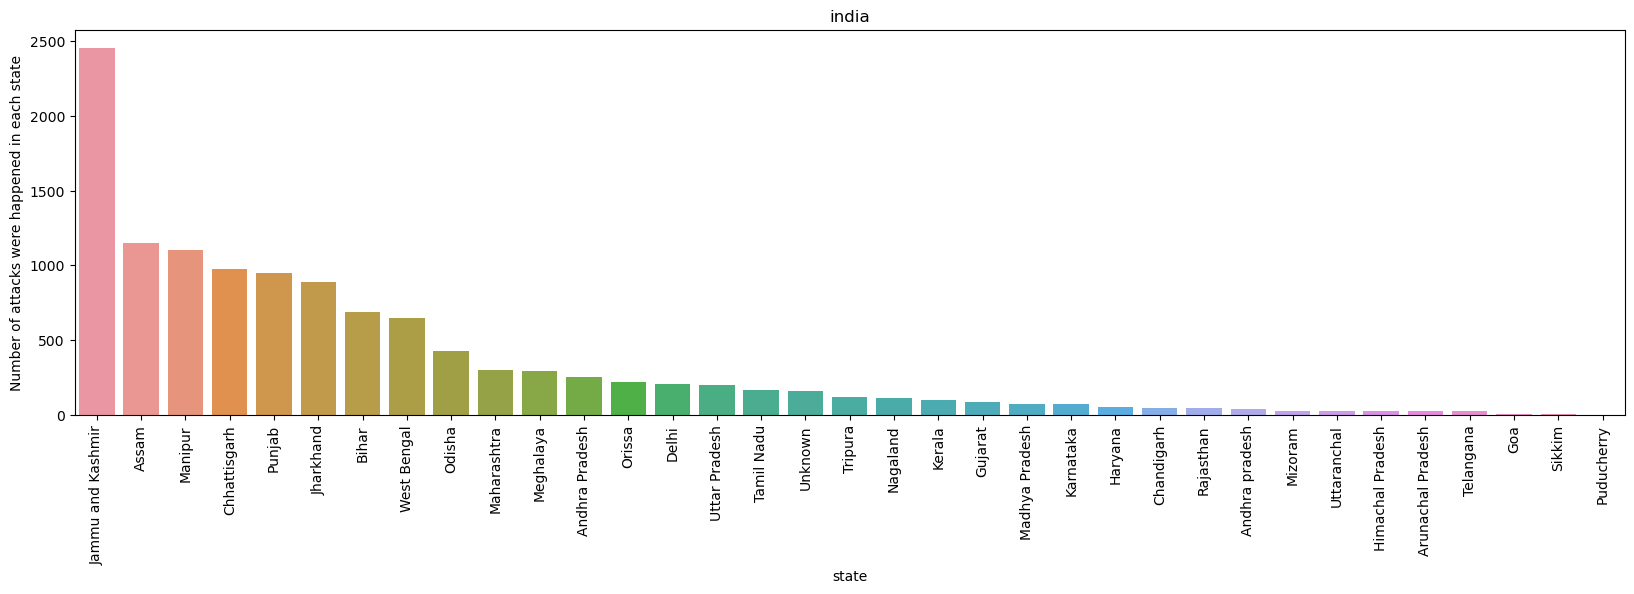

In [48]:
plt.figure(figsize=(20,5));
dataset_india=dataset_updated[dataset_updated['country_name']=='India']['state']
sns.barplot(x=dataset_india.value_counts().index,y=dataset_india.value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel('state')
plt.ylabel('Number of attacks were happened in each state')
plt.title('india')

Text(0.5, 1.0, 'india')

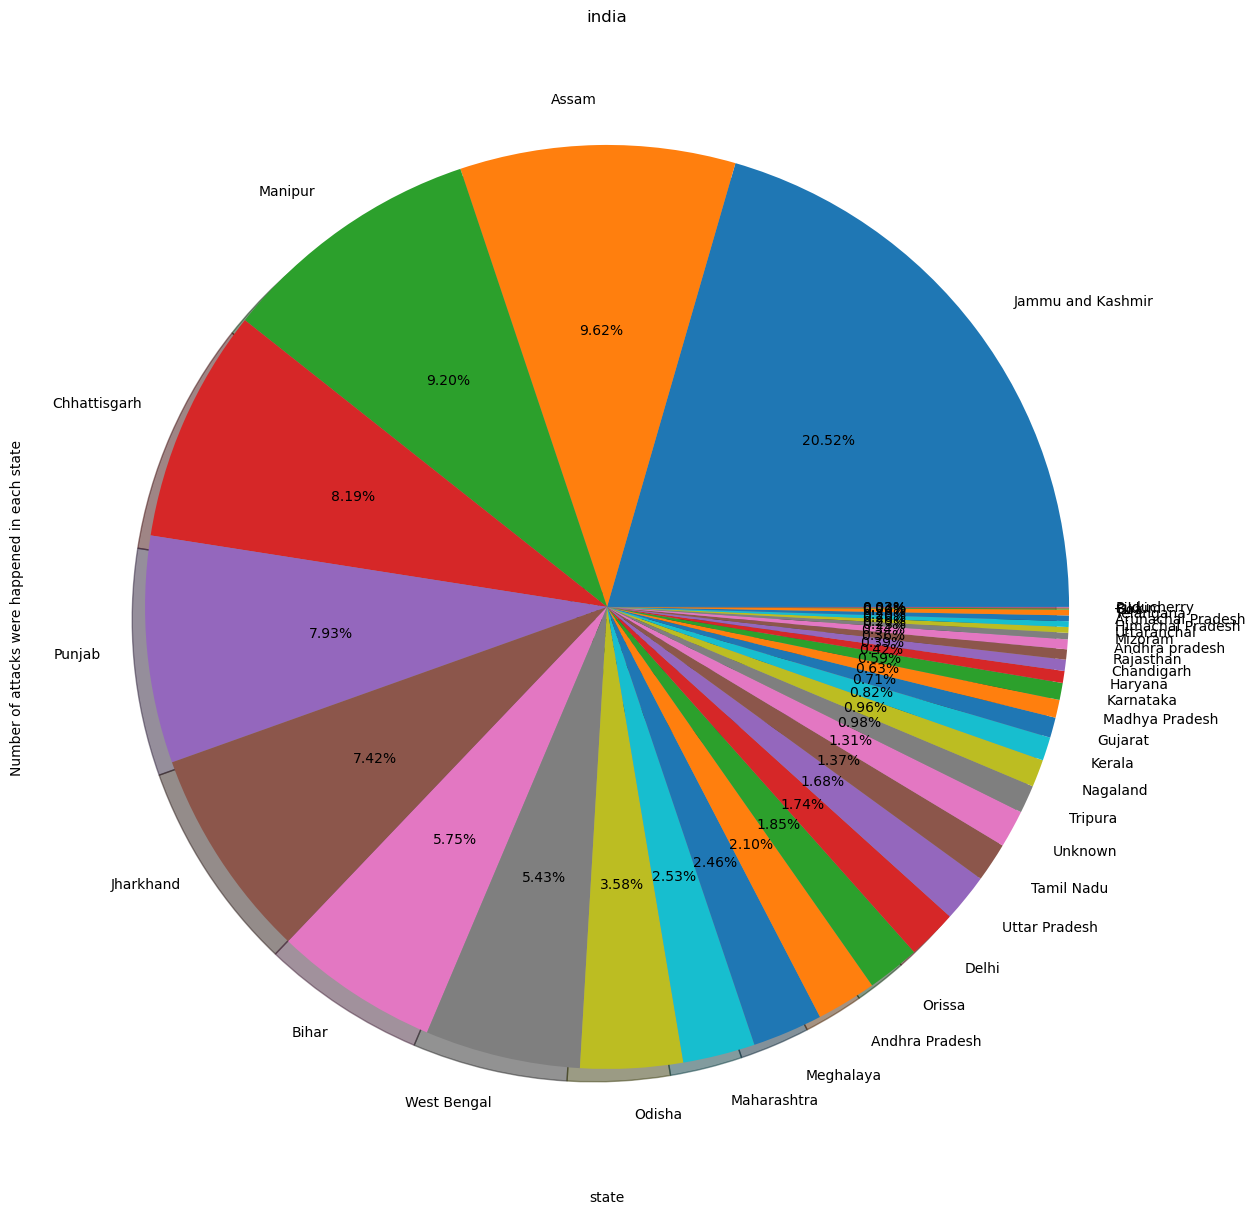

In [49]:
plt.figure(figsize=(90,15));
dataset_india.value_counts().plot.pie(shadow=True,autopct='%1.2f%%')

plt.xlabel('state')
plt.ylabel('Number of attacks were happened in each state')
plt.title('india')